**Credit Risk Using Pycaret**

In [1]:
#install library

#!pip install pycaret[full]

In [2]:
from pycaret.utils import version
version()

'3.3.2'

In [2]:
from pycaret.classification import *
import pandas as pd

# Load Dataset

In [3]:
data = pd.read_csv("home-credit-default-risk/application_train.csv")

# Set the option to display all columns
pd.set_option('display.max_columns', None)

data.head(5)

SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR  \
0      100002       1         Cash loans           M            N   
1      100003       0         Cash loans           F            N   
2      100004       0    Revolving loans           M            Y   
3      100006       0         Cash loans           F            N   
4      100007       0         Cash loans           M            N   

  FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  \
0               Y             0          202500.0    406597.5      24700.5   
1               N             0          270000.0   1293502.5      35698.5   
2               Y             0           67500.0    135000.0       6750.0   
3               Y             0          135000.0    312682.5      29686.5   
4               Y             0          121500.0    513000.0      21865.5   

   AMT_GOODS_PRICE NAME_TYPE_SUITE NAME_INCOME_TYPE  \
0         351000.0   Unaccompanied          Working   
1        1129500.0          Family    State servant   
2         135000.0   Unaccompanied          Working   
3         297000.0   Unaccompanied          Working   
4         513000.0   Unaccompanied          Working   

             NAME_EDUCATION_TYPE    NAME_FAMILY_STATUS  NAME_HOUSING_TYPE  \
0  Secondary / secondary special  Single / not married  House / apartment   
1               Higher education               Married  House / apartment   
2  Secondary / secondary special  Single / not married  House / apartment   
3  Secondary / secondary special        Civil marriage  House / apartment   
4  Secondary / secondary special  Single / not married  House / apartment   

   REGION_POPULATION_RELATIVE  DAYS_BIRTH  DAYS_EMPLOYED  DAYS_REGISTRATION  \
0                    0.018801       -9461           -637            -3648.0   
1                    0.003541      -16765          -1188            -1186.0   
2                    0.010032      -19046           -225            -4260.0   
3                    0.008019      -19005          -3039            -9833.0   
4                    0.028663      -19932          -3038            -4311.0   

   DAYS_ID_PUBLISH  OWN_CAR_AGE  FLAG_MOBIL  FLAG_EMP_PHONE  FLAG_WORK_PHONE  \
0            -2120          NaN           1               1                0   
1             -291          NaN           1               1                0   
2            -2531         26.0           1               1                1   
3            -2437          NaN           1               1                0   
4            -3458          NaN           1               1                0   

   FLAG_CONT_MOBILE  FLAG_PHONE  FLAG_EMAIL OCCUPATION_TYPE  CNT_FAM_MEMBERS  \
0                 1           1           0        Laborers              1.0   
1                 1           1           0      Core staff              2.0   
2                 1           1           0        Laborers              1.0   
3                 1           0           0        Laborers              2.0   
4                 1           0           0      Core staff              1.0   

   REGION_RATING_CLIENT  REGION_RATING_CLIENT_W_CITY  \
0                     2                            2   
1                     1                            1   
2                     2                            2   
3                     2                            2   
4                     2                            2   

  WEEKDAY_APPR_PROCESS_START  HOUR_APPR_PROCESS_START  \
0                  WEDNESDAY                       10   
1                     MONDAY                       11   
2                     MONDAY                        9   
3                  WEDNESDAY                       17   
4                   THURSDAY                       11   

   REG_REGION_NOT_LIVE_REGION  REG_REGION_NOT_WORK_REGION  \
0                           0                           0   
1                           0                           0   
2                        

In [3]:
data.shape

(307511, 122)

# Data Overview

In [6]:
data.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 122 columns):
 #    Column                        Dtype  
---   ------                        -----  
 0    SK_ID_CURR                    int64  
 1    TARGET                        int64  
 2    NAME_CONTRACT_TYPE            object 
 3    CODE_GENDER                   object 
 4    FLAG_OWN_CAR                  object 
 5    FLAG_OWN_REALTY               object 
 6    CNT_CHILDREN                  int64  
 7    AMT_INCOME_TOTAL              float64
 8    AMT_CREDIT                    float64
 9    AMT_ANNUITY                   float64
 10   AMT_GOODS_PRICE               float64
 11   NAME_TYPE_SUITE               object 
 12   NAME_INCOME_TYPE              object 
 13   NAME_EDUCATION_TYPE           object 
 14   NAME_FAMILY_STATUS            object 
 15   NAME_HOUSING_TYPE             object 
 16   REGION_POPULATION_RELATIVE    float64
 17   DAYS_BIRTH                    int64  
 18   DA

**Showing all the features that have missing value > 50% of data**

for these following features below, will not be used. as it has missing value too large, imputing the missing value will just alter the model results

In [4]:
missing_columns= data.isna().sum()[data.isna().sum() > len(data) / 2 ]
missing_columns

OWN_CAR_AGE                 202929
EXT_SOURCE_1                173378
APARTMENTS_AVG              156061
BASEMENTAREA_AVG            179943
YEARS_BUILD_AVG             204488
COMMONAREA_AVG              214865
ELEVATORS_AVG               163891
ENTRANCES_AVG               154828
FLOORSMIN_AVG               208642
LANDAREA_AVG                182590
LIVINGAPARTMENTS_AVG        210199
LIVINGAREA_AVG              154350
NONLIVINGAPARTMENTS_AVG     213514
NONLIVINGAREA_AVG           169682
APARTMENTS_MODE             156061
BASEMENTAREA_MODE           179943
YEARS_BUILD_MODE            204488
COMMONAREA_MODE             214865
ELEVATORS_MODE              163891
ENTRANCES_MODE              154828
FLOORSMIN_MODE              208642
LANDAREA_MODE               182590
LIVINGAPARTMENTS_MODE       210199
LIVINGAREA_MODE             154350
NONLIVINGAPARTMENTS_MODE    213514
NONLIVINGAREA_MODE          169682
APARTMENTS_MEDI             156061
BASEMENTAREA_MEDI           179943
YEARS_BUILD_MEDI    

In [8]:
data.duplicated().sum()

0

In [9]:
data.describe()

SK_ID_CURR         TARGET   CNT_CHILDREN  AMT_INCOME_TOTAL  \
count  307511.000000  307511.000000  307511.000000      3.075110e+05   
mean   278180.518577       0.080729       0.417052      1.687979e+05   
std    102790.175348       0.272419       0.722121      2.371231e+05   
min    100002.000000       0.000000       0.000000      2.565000e+04   
25%    189145.500000       0.000000       0.000000      1.125000e+05   
50%    278202.000000       0.000000       0.000000      1.471500e+05   
75%    367142.500000       0.000000       1.000000      2.025000e+05   
max    456255.000000       1.000000      19.000000      1.170000e+08   

         AMT_CREDIT    AMT_ANNUITY  AMT_GOODS_PRICE  \
count  3.075110e+05  307499.000000     3.072330e+05   
mean   5.990260e+05   27108.573909     5.383962e+05   
std    4.024908e+05   14493.737315     3.694465e+05   
min    4.500000e+04    1615.500000     4.050000e+04   
25%    2.700000e+05   16524.000000     2.385000e+05   
50%    5.135310e+05   24903.000000     4.500000e+05   
75%    8.086500e+05   34596.000000     6.795000e+05   
max    4.050000e+06  258025.500000     4.050000e+06   

       REGION_POPULATION_RELATIVE     DAYS_BIRTH  DAYS_EMPLOYED  \
count               307511.000000  307511.000000  307511.000000   
mean                     0.020868  -16036.995067   63815.045904   
std                      0.013831    4363.988632  141275.766519   
min                      0.000290  -25229.000000  -17912.000000   
25%                      0.010006  -19682.000000   -2760.000000   
50%                      0.018850  -15750.000000   -1213.000000   
75%                      0.028663  -12413.000000    -289.000000   
max                      0.072508   -7489.000000  365243.000000   

       DAYS_REGISTRATION  DAYS_ID_PUBLISH    OWN_CAR_AGE     FLAG_MOBIL  \
count      307511.000000    307511.000000  104582.000000  307511.000000   
mean        -4986.120328     -2994.202373      12.061091       0.999997   
std          3522.886321      1509.450419      11.944812       0.001803   
min        -24672.000000     -7197.000000       0.000000       0.000000   
25%         -7479.500000     -4299.000000       5.000000       1.000000   
50%         -4504.000000     -3254.000000       9.000000       1.000000   
75%         -2010.000000     -1720.000000      15.000000       1.000000   
max             0.000000         0.000000      91.000000       1.000000   

       FLAG_EMP_PHONE  FLAG_WORK_PHONE  FLAG_CONT_MOBILE     FLAG_PHONE  \
count   307511.000000    307511.000000     307511.000000  307511.000000   
mean         0.819889         0.199368          0.998133       0.281066   
std          0.384280         0.399526          0.043164       0.449521   
min          0.000000         0.000000          0.000000       0.000000   
25%          1.000000         0.000000          1.000000       0.000000   
50%          1.000000         0.000000          1.000000       0.000000   
75%          1.000000         0.000000          1.000000       1.000000   
max          1.000000         1.000000          1.000000       1.000000   

          FLAG_EMAIL  CNT_FAM_MEMBERS  REGION_RATING_CLIENT  \
count  307511.000000    307509.000000         307511.000000   
mean        0.056720         2.152665              2.052463   
std         0.231307         0.910682              0.509034   
min         0.000000         1.000000              1.000000   
25%         0.000000         2.000000              2.000000   
50%         0.000000         2.000000              2.000000   
75%         0.000000         3.000000              2.000000   
max         1.000000        20.000000              3.000000   

       REGION_RATING_CLIENT_W_CITY  HOUR_APPR_PROCESS_START  \
count                307511.000000            307511.000000   
mean                      2.031521                12.063419   
std                       0.502737                 3.265832   
min                       1.000000                 0.000000   
25%                       

In [11]:
data.describe(include='all')

SK_ID_CURR         TARGET NAME_CONTRACT_TYPE CODE_GENDER  \
count   307511.000000  307511.000000             307511      307511   
unique            NaN            NaN                  2           3   
top               NaN            NaN         Cash loans           F   
freq              NaN            NaN             278232      202448   
mean    278180.518577       0.080729                NaN         NaN   
std     102790.175348       0.272419                NaN         NaN   
min     100002.000000       0.000000                NaN         NaN   
25%     189145.500000       0.000000                NaN         NaN   
50%     278202.000000       0.000000                NaN         NaN   
75%     367142.500000       0.000000                NaN         NaN   
max     456255.000000       1.000000                NaN         NaN   

       FLAG_OWN_CAR FLAG_OWN_REALTY   CNT_CHILDREN  AMT_INCOME_TOTAL  \
count        307511          307511  307511.000000      3.075110e+05   
unique            2               2            NaN               NaN   
top               N               Y            NaN               NaN   
freq         202924          213312            NaN               NaN   
mean            NaN             NaN       0.417052      1.687979e+05   
std             NaN             NaN       0.722121      2.371231e+05   
min             NaN             NaN       0.000000      2.565000e+04   
25%             NaN             NaN       0.000000      1.125000e+05   
50%             NaN             NaN       0.000000      1.471500e+05   
75%             NaN             NaN       1.000000      2.025000e+05   
max             NaN             NaN      19.000000      1.170000e+08   

          AMT_CREDIT    AMT_ANNUITY  AMT_GOODS_PRICE NAME_TYPE_SUITE  \
count   3.075110e+05  307499.000000     3.072330e+05          306219   
unique           NaN            NaN              NaN               7   
top              NaN            NaN              NaN   Unaccompanied   
freq             NaN            NaN              NaN          248526   
mean    5.990260e+05   27108.573909     5.383962e+05             NaN   
std     4.024908e+05   14493.737315     3.694465e+05             NaN   
min     4.500000e+04    1615.500000     4.050000e+04             NaN   
25%     2.700000e+05   16524.000000     2.385000e+05             NaN   
50%     5.135310e+05   24903.000000     4.500000e+05             NaN   
75%     8.086500e+05   34596.000000     6.795000e+05             NaN   
max     4.050000e+06  258025.500000     4.050000e+06             NaN   

       NAME_INCOME_TYPE            NAME_EDUCATION_TYPE NAME_FAMILY_STATUS  \
count            307511                         307511             307511   
unique                8                              5                  6   
top             Working  Secondary / secondary special            Married   
freq             158774                         218391             196432   
mean                NaN                            NaN                NaN   
std                 NaN                            NaN                NaN   
min                 NaN                            NaN                NaN   
25%                 NaN                            NaN                NaN   
50%                 NaN                            NaN                NaN   
75%                 NaN                            NaN                NaN   
max                 NaN                            NaN                NaN   

        NAME_HOUSING_TYPE  REGION_POPULATION_RELATIVE     DAYS_BIRTH  \
count              307511               307511.000000  307511.000000   
unique                  6                         NaN            NaN   
top     House / apartment                         NaN            NaN   
freq               272868                         NaN            NaN   
mean                  NaN                    0.020868  -16036.995067   
std                   NaN                    0.013831    4363.988632   

## Data Preparation

**Separating Features Data Types**

for ease of handling during EDA & Modeling, and parameter preparation for the AutoML library.

### **Ordinal Feature Encoding**

CNT_CHILDREN
CNT_FAM_MEMBERS
WEEKDAY_APPR_PROCESS_START

for above features will be mapped as it show some semblance of ordinality

In [5]:
for i in ['CNT_CHILDREN',
          'CNT_FAM_MEMBERS',
          'WEEKDAY_APPR_PROCESS_START',
          'EMERGENCYSTATE_MODE',
          'FLAG_OWN_CAR',
          'FLAG_OWN_REALTY']:
    print(f'\n Column value counts {data[i].value_counts()}')


 Column value counts CNT_CHILDREN
0     215371
1      61119
2      26749
3       3717
4        429
5         84
6         21
7          7
14         3
8          2
9          2
12         2
10         2
19         2
11         1
Name: count, dtype: int64

 Column value counts CNT_FAM_MEMBERS
2.0     158357
1.0      67847
3.0      52601
4.0      24697
5.0       3478
6.0        408
7.0         81
8.0         20
9.0          6
10.0         3
14.0         2
12.0         2
20.0         2
16.0         2
13.0         1
15.0         1
11.0         1
Name: count, dtype: int64

 Column value counts WEEKDAY_APPR_PROCESS_START
TUESDAY      53901
WEDNESDAY    51934
MONDAY       50714
THURSDAY     50591
FRIDAY       50338
SATURDAY     33852
SUNDAY       16181
Name: count, dtype: int64

 Column value counts EMERGENCYSTATE_MODE
No     159428
Yes      2328
Name: count, dtype: int64

 Column value counts FLAG_OWN_CAR
N    202924
Y    104587
Name: count, dtype: int64

 Column value counts FLAG_OWN_REALT

In [5]:
# Create the ordinal encoding dictionary
ordinal_encoding = {
    'CNT_CHILDREN': {
        0: 0,
        1: 1,
        2: 2,
        3: 3,
        4: 4,
        5: 5,
        6: 6,
        7: 7,
        8: 8,
        9: 9,
        10: 10,
        11: 11,
        12: 12,
        14: 13,
        19: 14
    },
    'CNT_FAM_MEMBERS': {
        1.0: 0,
        2.0: 1,
        3.0: 2,
        4.0: 3,
        5.0: 4,
        6.0: 5,
        7.0: 6,
        8.0: 7,
        9.0: 8,
        10.0: 9,
        11.0: 10,
        12.0: 11,
        13.0: 12,
        14.0: 13,
        15.0: 14,
        16.0: 15,
        20.0: 16
    },
    'WEEKDAY_APPR_PROCESS_START': {
        'MONDAY': 0,
        'TUESDAY': 1,
        'WEDNESDAY': 2,
        'THURSDAY': 3,
        'FRIDAY': 4,
        'SATURDAY': 5,
        'SUNDAY': 6
    },
    'EMERGENCYSTATE_MODE': {
        'No': 0,
        'Yes': 1
    },
    'FLAG_OWN_CAR': {
        'N': 0,
        'Y': 1
    },
    'FLAG_OWN_REALTY': {
        'N': 0,
        'Y': 1
    }
        
}

### Date features

for date features will be engineered to show each date of coresponding features
e.g (age, employment year)

In [6]:
data[['DAYS_ID_PUBLISH','DAYS_LAST_PHONE_CHANGE','DAYS_REGISTRATION','DAYS_EMPLOYED','DAYS_BIRTH']].head(3)

DAYS_ID_PUBLISH  DAYS_LAST_PHONE_CHANGE  DAYS_REGISTRATION  DAYS_EMPLOYED  \
0            -2120                 -1134.0            -3648.0           -637   
1             -291                  -828.0            -1186.0          -1188   
2            -2531                  -815.0            -4260.0           -225   

   DAYS_BIRTH  
0       -9461  
1      -16765  
2      -19046

we will create a preprocess function to process date data type features. so we can implement the same processing step to the new test dataset

In [7]:
# Preprocessing function
def preprocess_data(df):
    # Calculate and replace the original features with the new derived features
    df['AGE'] = -df['DAYS_BIRTH'] // 365.25  # Calculate age
    df['YEARS_EMPLOYED'] = -df['DAYS_EMPLOYED'] // 365.25  # Calculate employment years
    df['REGISTRATION_YEARS'] = -df['DAYS_REGISTRATION'] // 365.25  # Calculate registration years
    df['ID_PUBLISH_YEARS'] = -df['DAYS_ID_PUBLISH'] // 365.25  # Calculate ID publish years
    df['PHONE_CHANGE_YEARS'] = -df['DAYS_LAST_PHONE_CHANGE'] // 365.25  # Calculate last phone change years
    
    # Drop the original features
    df.drop(columns=['DAYS_BIRTH', 'DAYS_EMPLOYED', 'DAYS_REGISTRATION', 
                     'DAYS_ID_PUBLISH', 'DAYS_LAST_PHONE_CHANGE'], inplace=True)
    
    return df

data = preprocess_data(data)

### Categorical Feature Encoding

For the **Nominal** Categorical features will be listed for the library to conduct OHE (One Hot Encoding).

In [8]:
# features to ignore (drop) on preprocessing & modeling
ignore_feat = ['SK_ID_CURR'] + missing_columns.index.to_list()

# numerical features
numerical_feat = [
    'AMT_INCOME_TOTAL',
    'AMT_CREDIT',
    'AMT_ANNUITY',
    'AMT_GOODS_PRICE',
    'REGION_POPULATION_RELATIVE',
    'REGION_RATING_CLIENT',
    'REGION_RATING_CLIENT_W_CITY',
    'EXT_SOURCE_1',
    'EXT_SOURCE_2',
    'EXT_SOURCE_3',
    'APARTMENTS_AVG',
    'BASEMENTAREA_AVG',
    'YEARS_BEGINEXPLUATATION_AVG',
    'YEARS_BUILD_AVG',
    'COMMONAREA_AVG',
    'ELEVATORS_AVG',
    'ENTRANCES_AVG',
    'FLOORSMAX_AVG',
    'FLOORSMIN_AVG',
    'LANDAREA_AVG',
    'LIVINGAPARTMENTS_AVG',
    'LIVINGAREA_AVG',
    'NONLIVINGAPARTMENTS_AVG',
    'NONLIVINGAREA_AVG',
    'APARTMENTS_MODE',
    'BASEMENTAREA_MODE',
    'YEARS_BEGINEXPLUATATION_MODE',
    'YEARS_BUILD_MODE',
    'COMMONAREA_MODE',
    'ELEVATORS_MODE',
    'ENTRANCES_MODE',
    'FLOORSMAX_MODE',
    'FLOORSMIN_MODE',
    'LANDAREA_MODE',
    'LIVINGAPARTMENTS_MODE',
    'LIVINGAREA_MODE',
    'NONLIVINGAPARTMENTS_MODE',
    'NONLIVINGAREA_MODE',
    'APARTMENTS_MEDI',
    'BASEMENTAREA_MEDI',
    'YEARS_BEGINEXPLUATATION_MEDI',
    'YEARS_BUILD_MEDI',
    'COMMONAREA_MEDI',
    'ELEVATORS_MEDI',
    'ENTRANCES_MEDI',
    'FLOORSMAX_MEDI',
    'FLOORSMIN_MEDI',
    'LANDAREA_MEDI',
    'LIVINGAPARTMENTS_MEDI',
    'LIVINGAREA_MEDI',
    'NONLIVINGAPARTMENTS_MEDI',
    'NONLIVINGAREA_MEDI',
    'FONDKAPREMONT_MODE',
    'HOUSETYPE_MODE',
    'TOTALAREA_MODE',
    'OBS_30_CNT_SOCIAL_CIRCLE',
    'DEF_30_CNT_SOCIAL_CIRCLE',
    'OBS_60_CNT_SOCIAL_CIRCLE',
    'DEF_60_CNT_SOCIAL_CIRCLE',
    'AMT_REQ_CREDIT_BUREAU_HOUR',
    'AMT_REQ_CREDIT_BUREAU_DAY',
    'AMT_REQ_CREDIT_BUREAU_WEEK',
    'AMT_REQ_CREDIT_BUREAU_MON',
    'AMT_REQ_CREDIT_BUREAU_QRT',
    'AMT_REQ_CREDIT_BUREAU_YEAR'
]

# Remove features in ignore_feat from numerical_feat
numerical_feat = [feature for feature in numerical_feat if feature not in ignore_feat]

# categorical features
categorical_feat = [
    'NAME_CONTRACT_TYPE',
    'CODE_GENDER',
    'NAME_TYPE_SUITE',
    'NAME_INCOME_TYPE',
    'NAME_EDUCATION_TYPE',
    'NAME_FAMILY_STATUS',
    'NAME_HOUSING_TYPE',
    'OCCUPATION_TYPE',
    'ORGANIZATION_TYPE',
]

# Ordinal features
# ordinal_encoding

## Exploratory Data Analysis

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


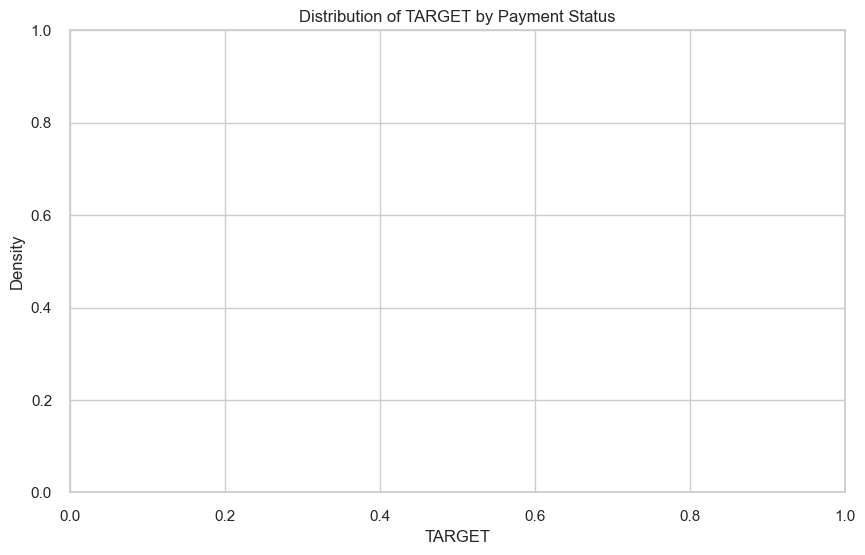

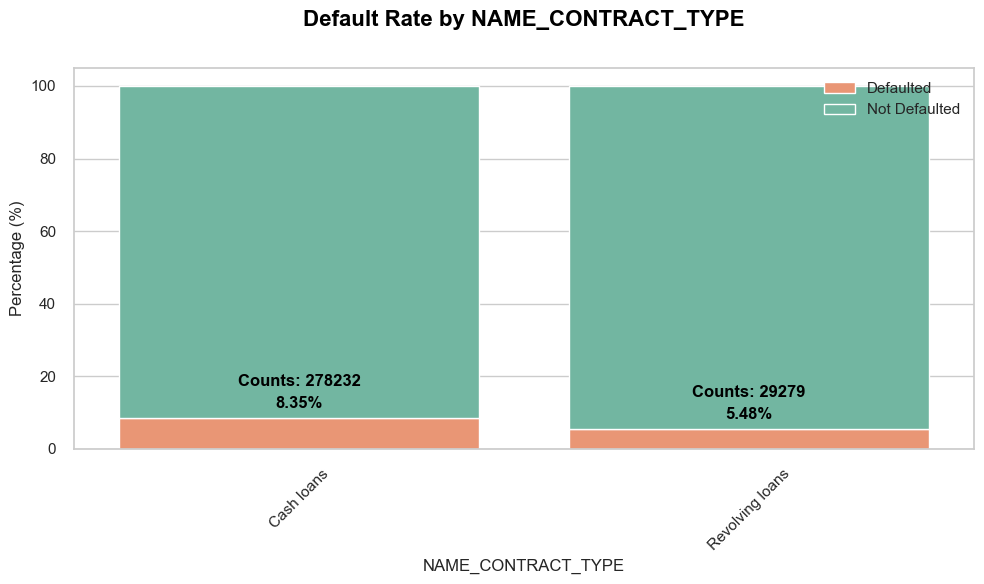

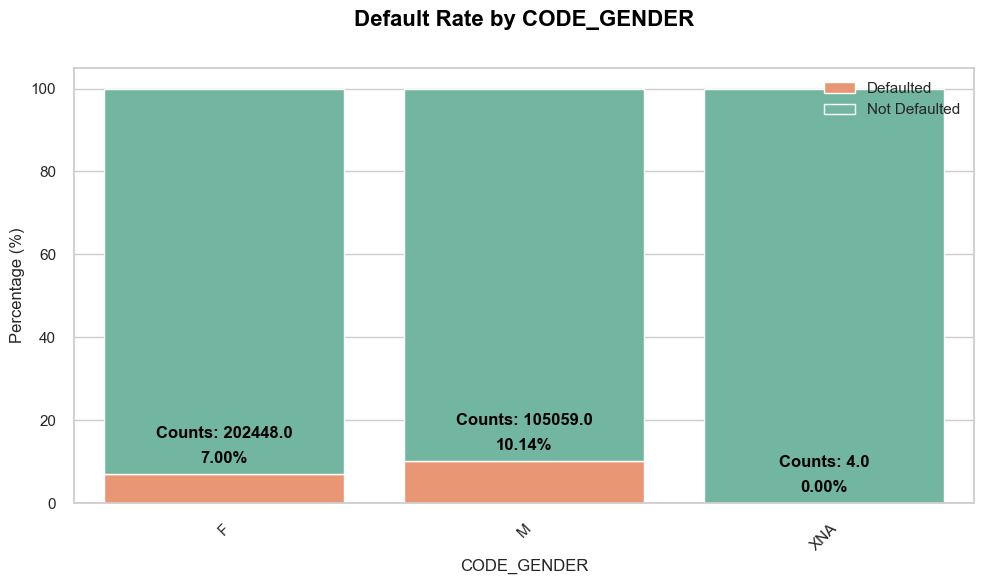

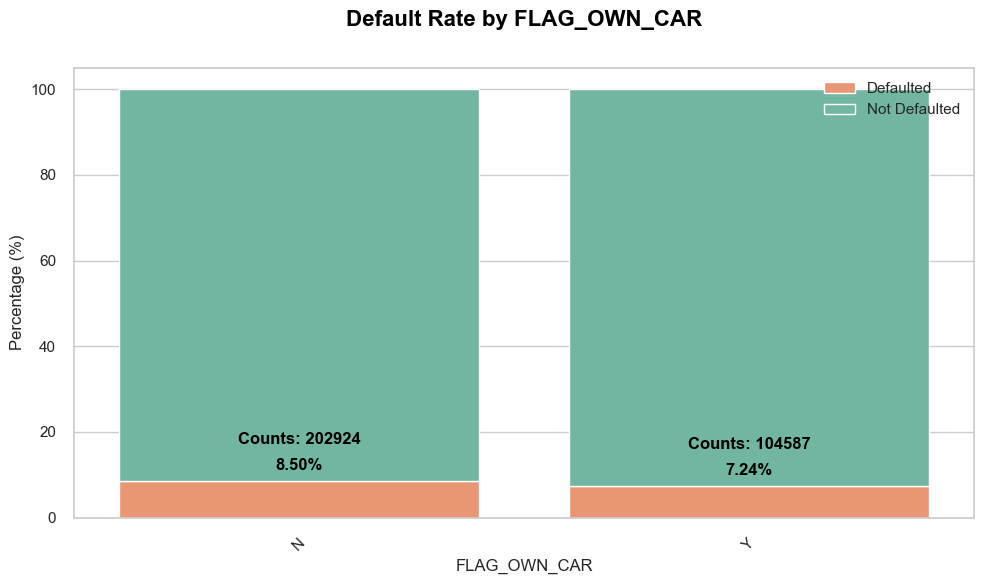

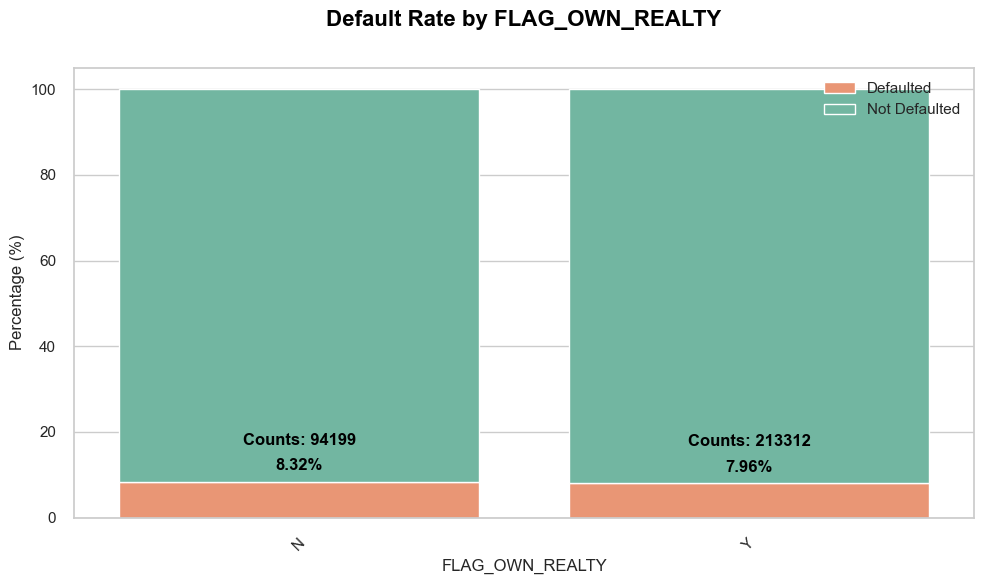

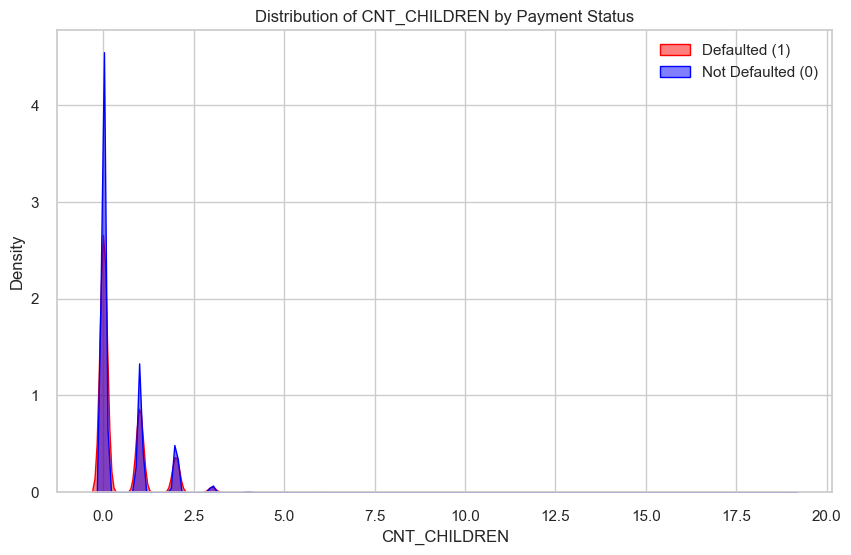

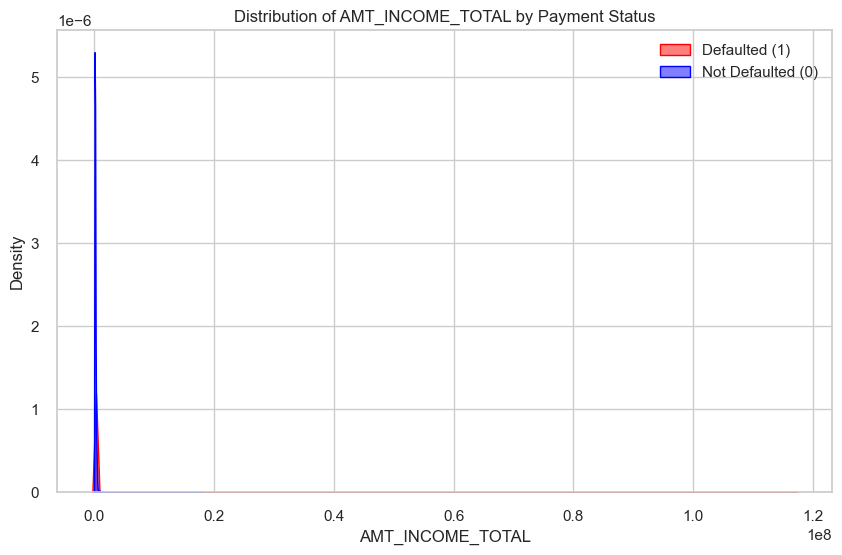

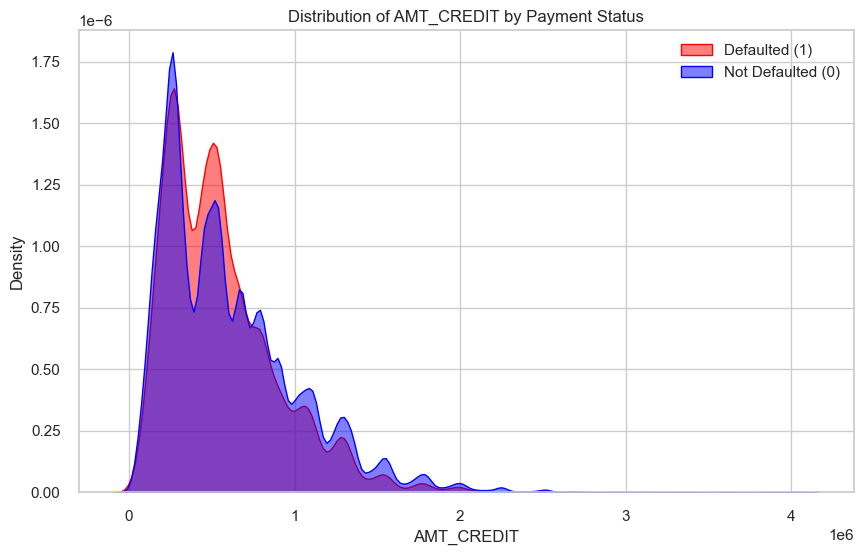

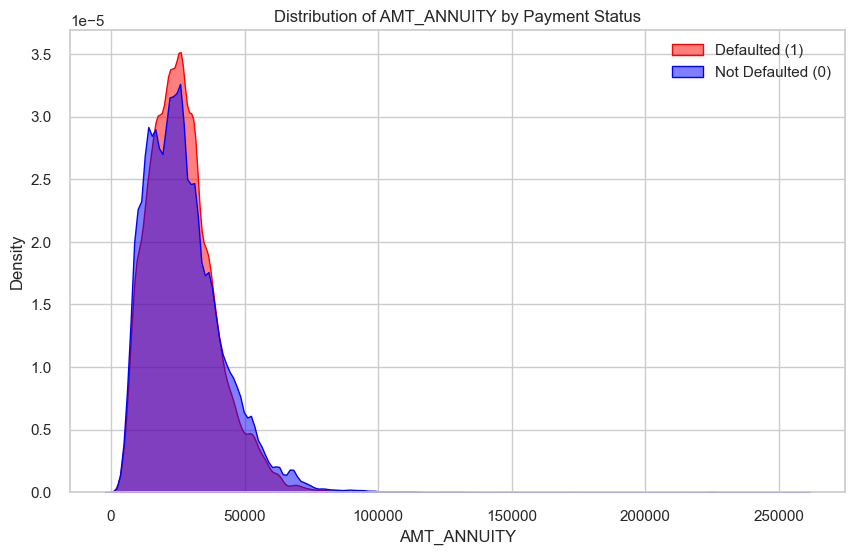

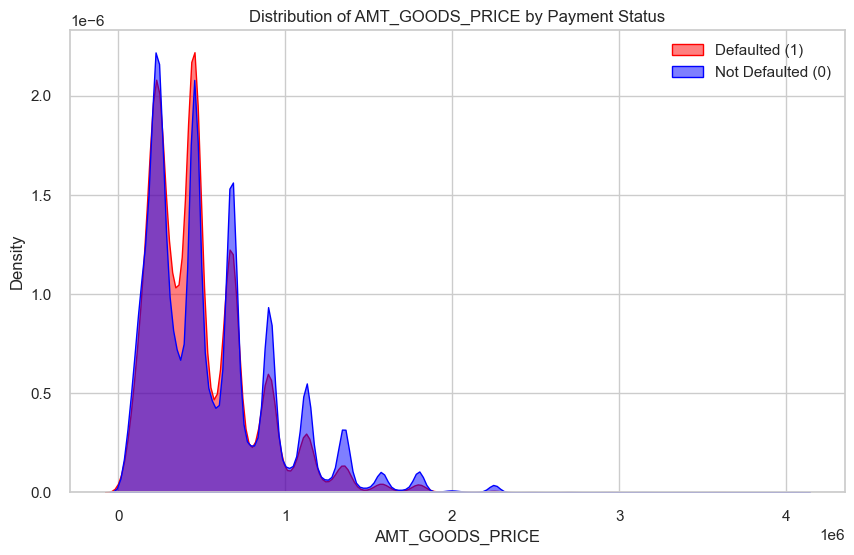

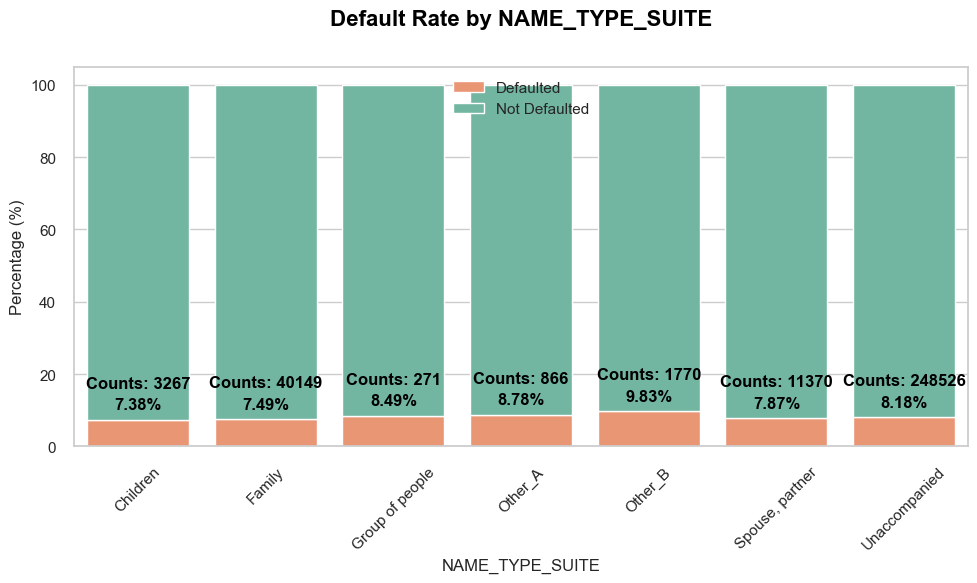

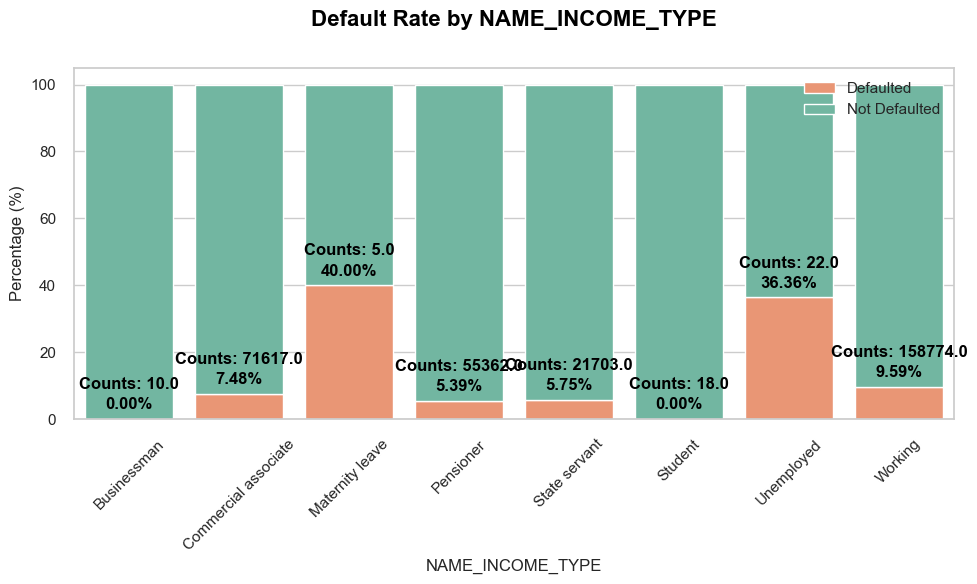

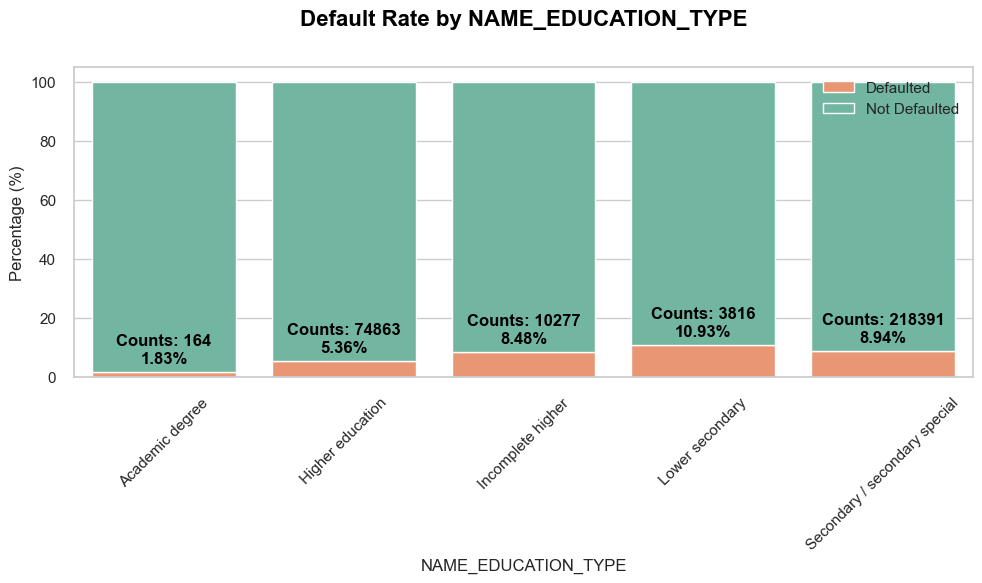

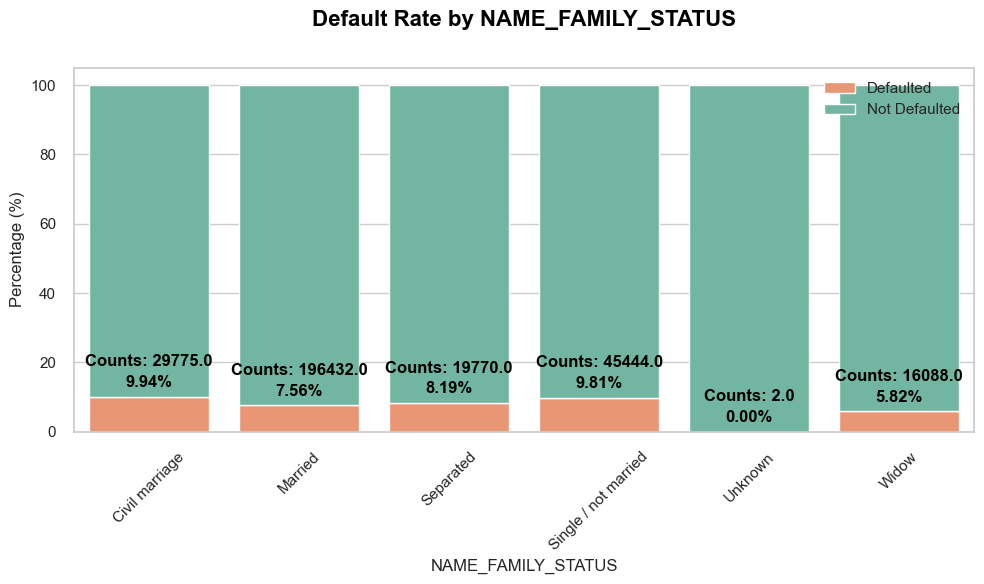

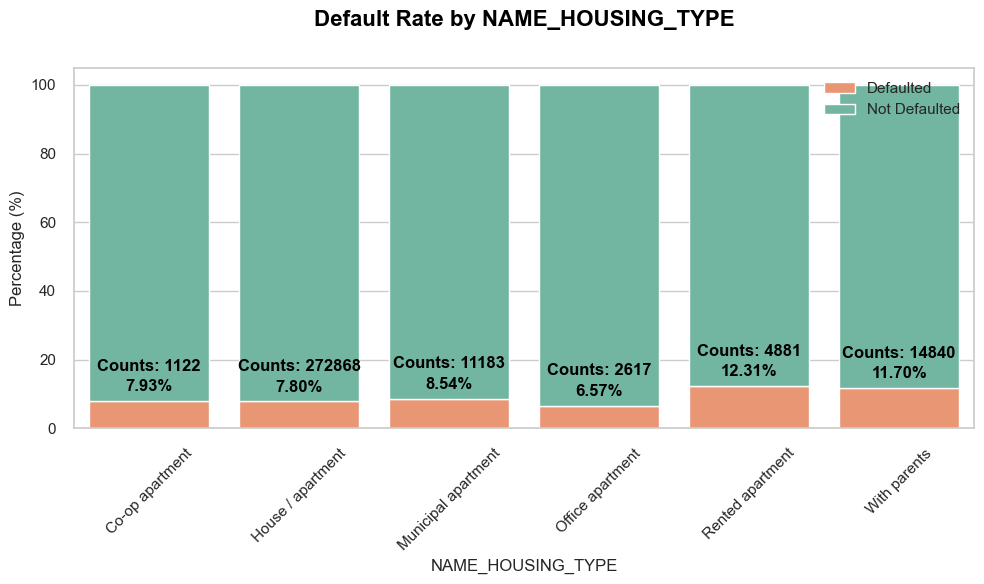

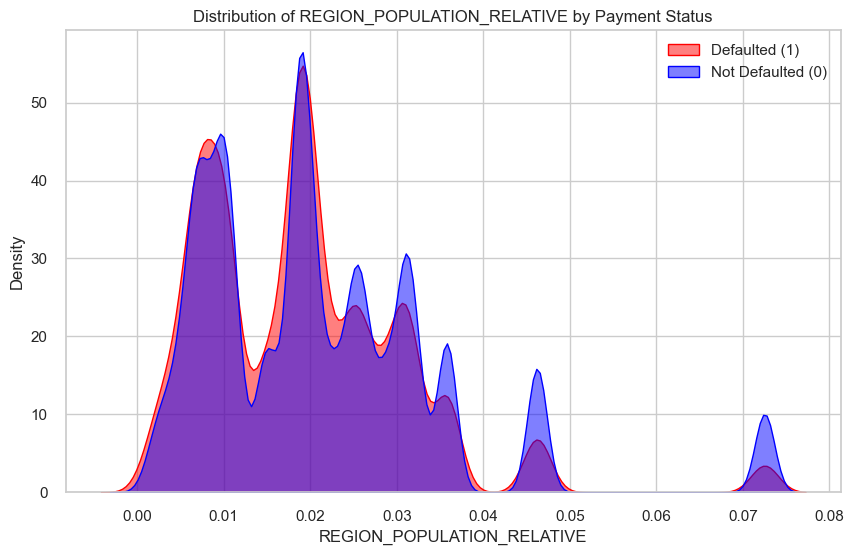

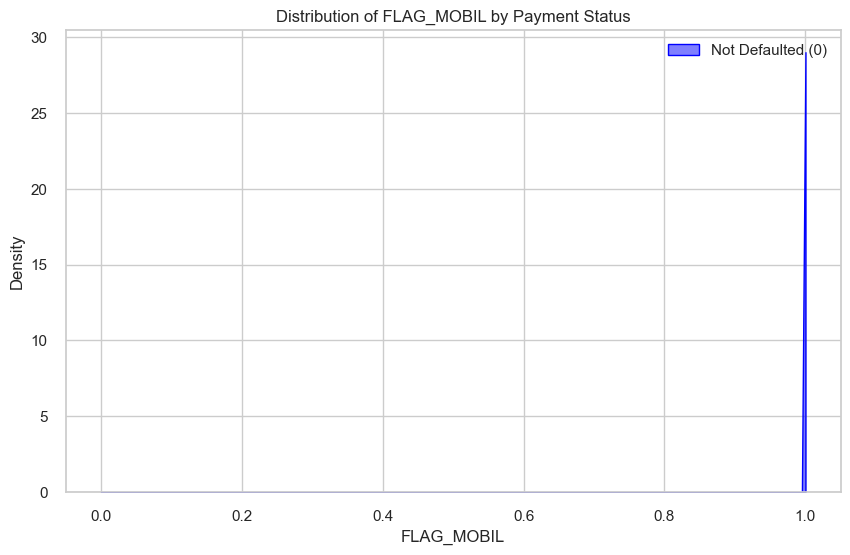

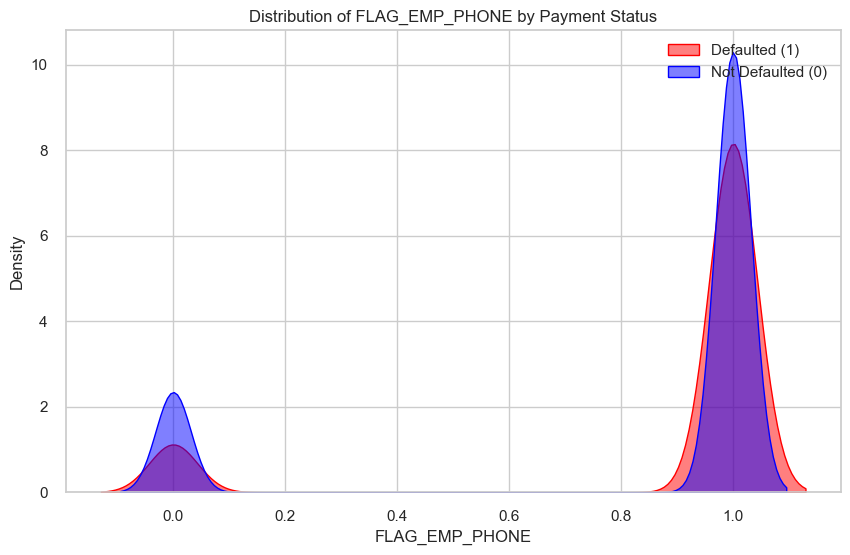

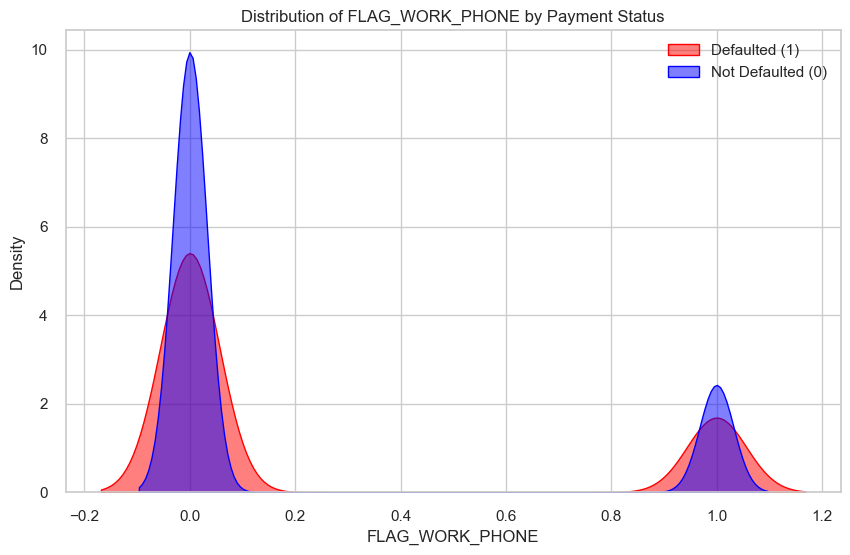

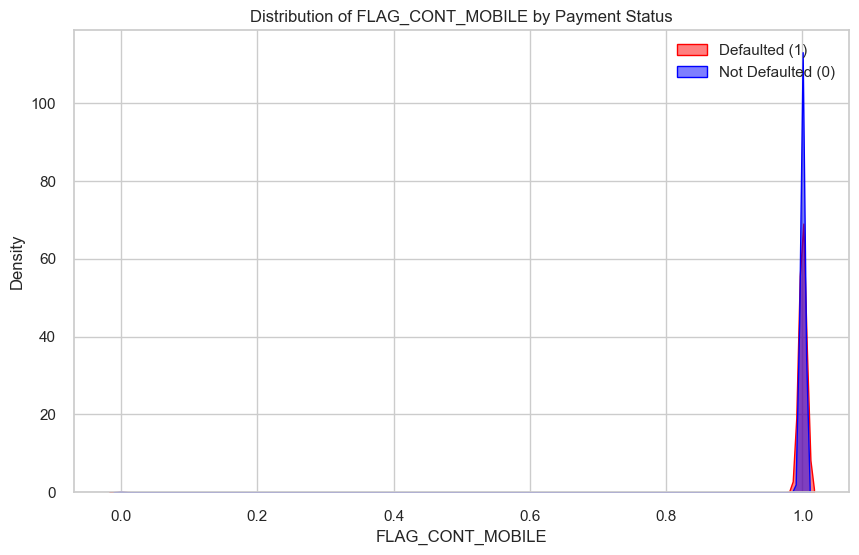

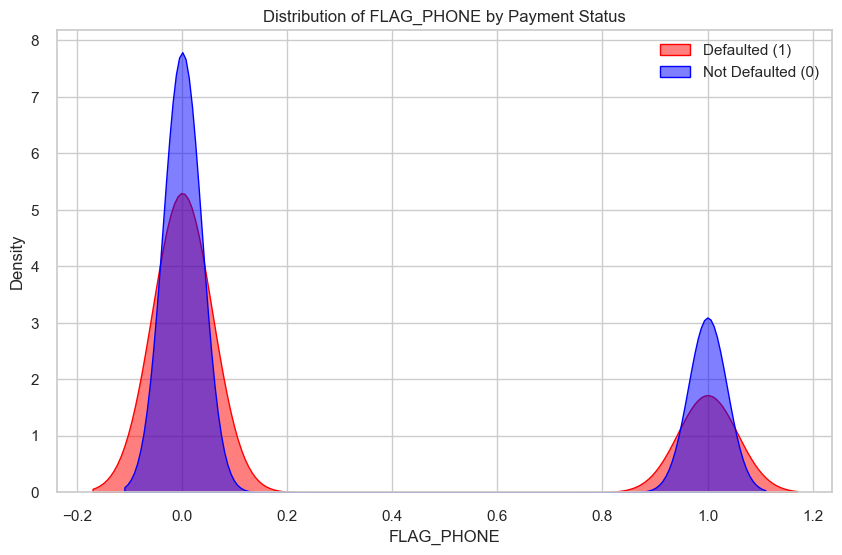

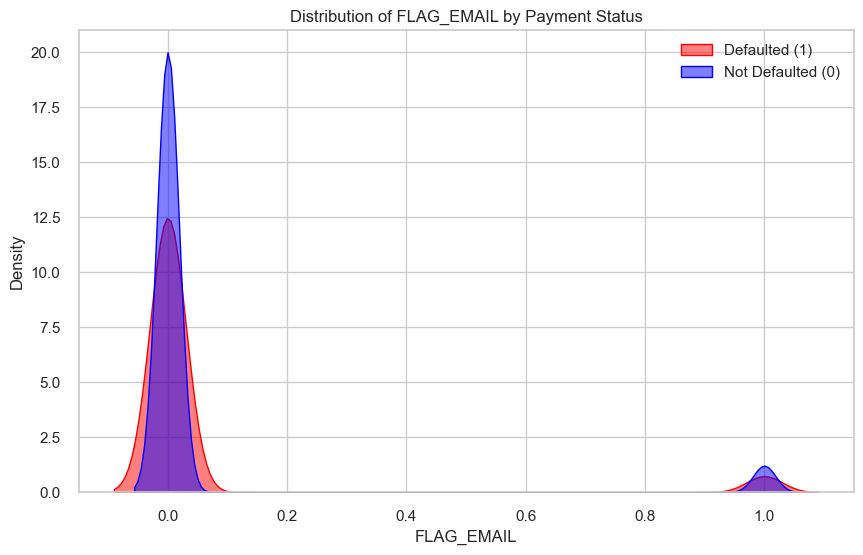

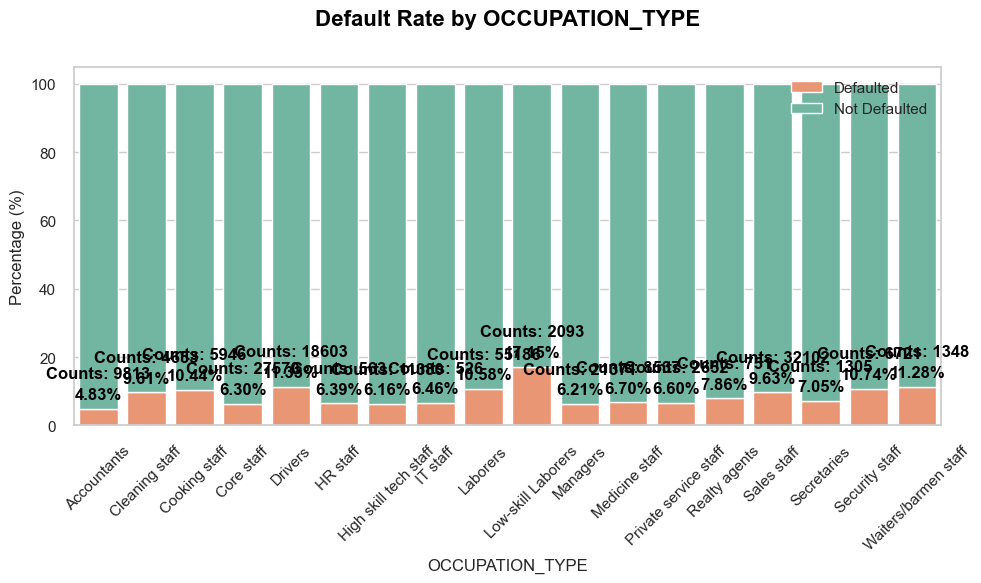

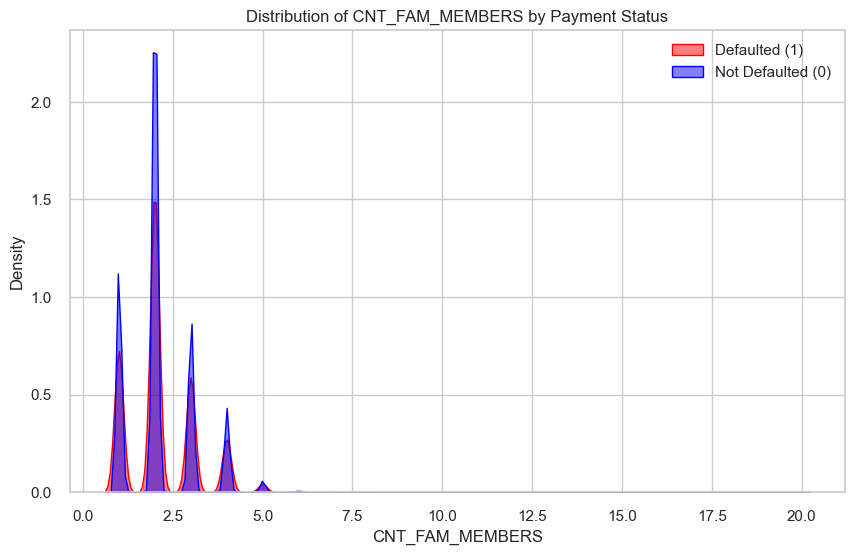

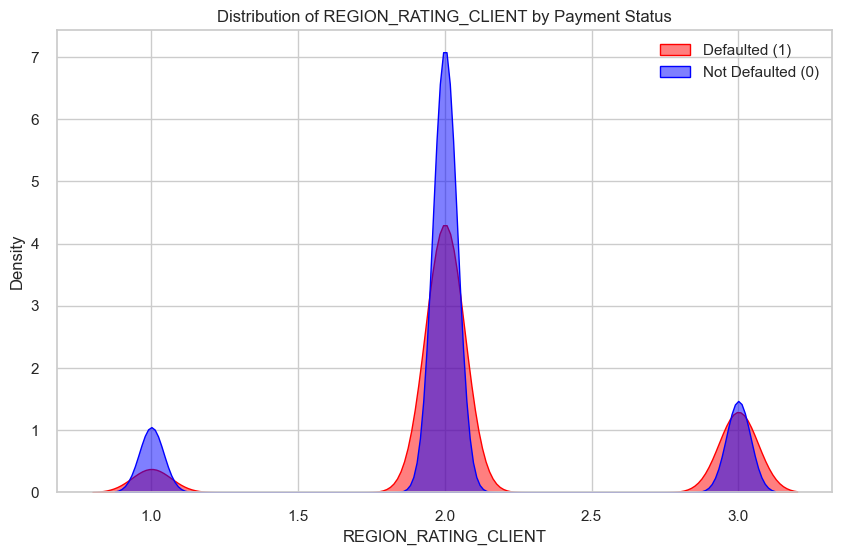

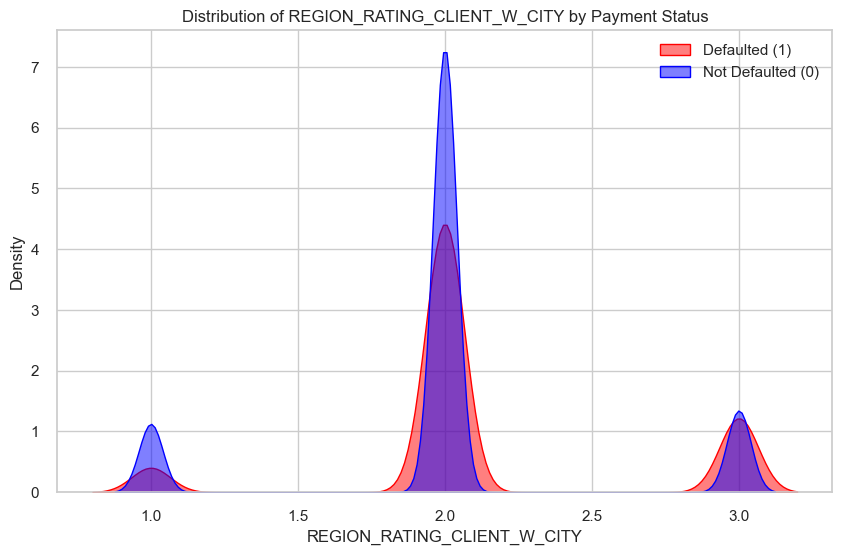

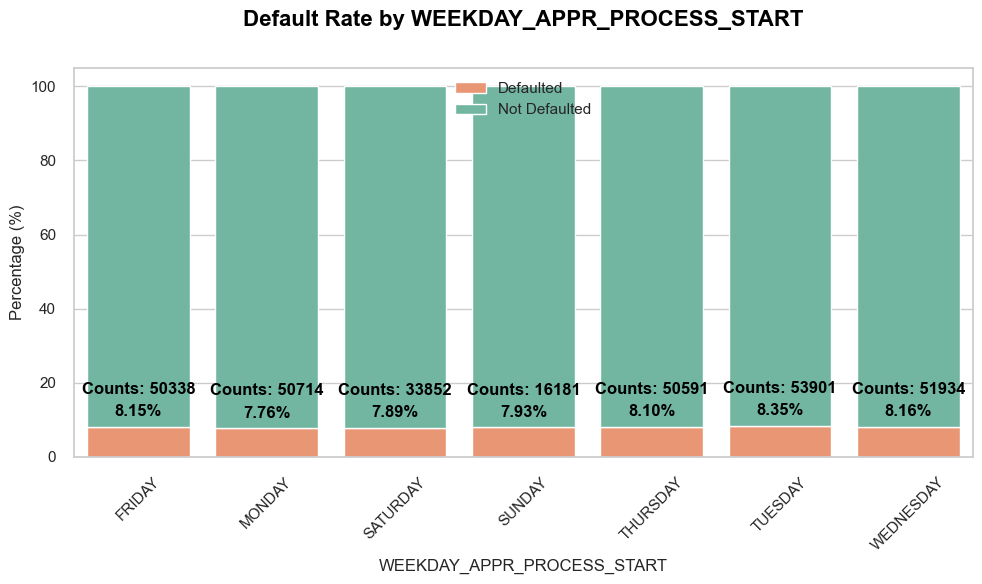

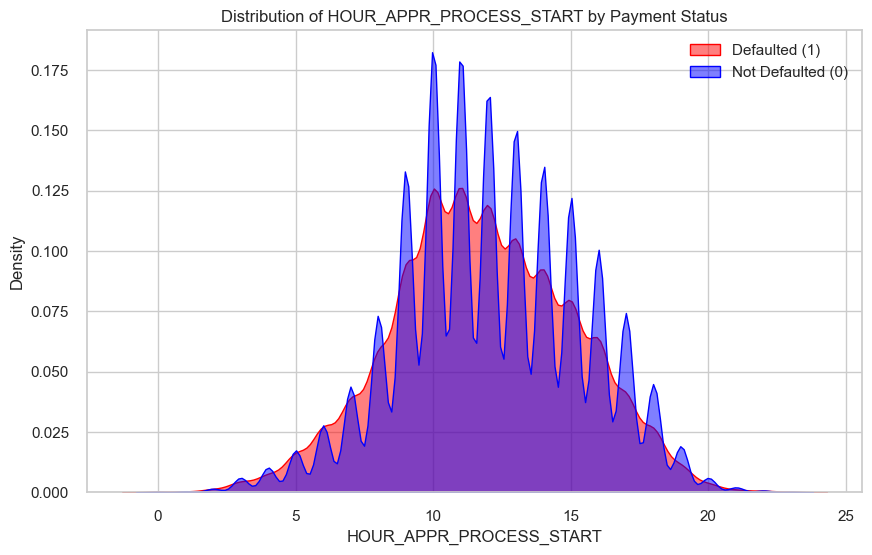

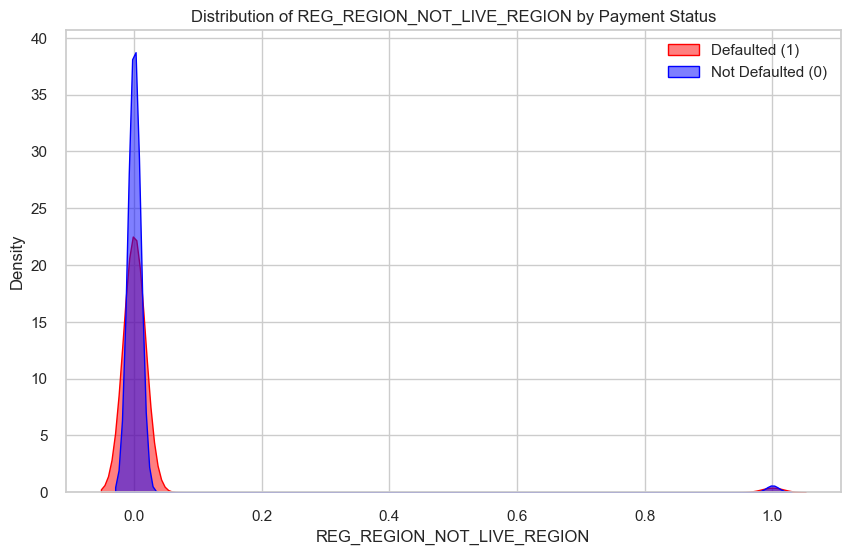

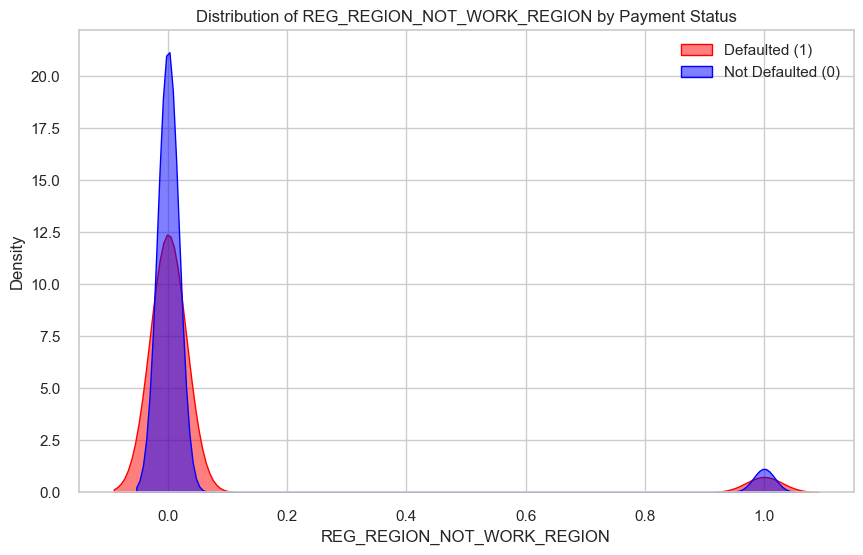

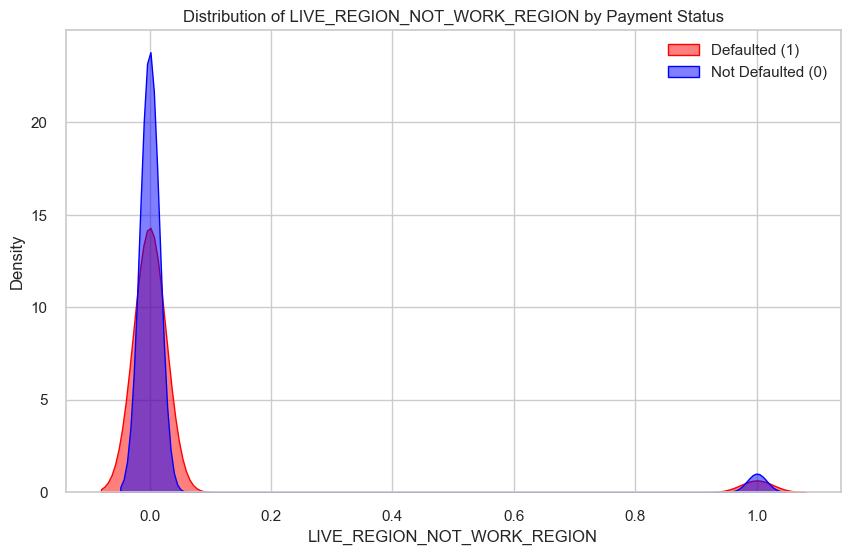

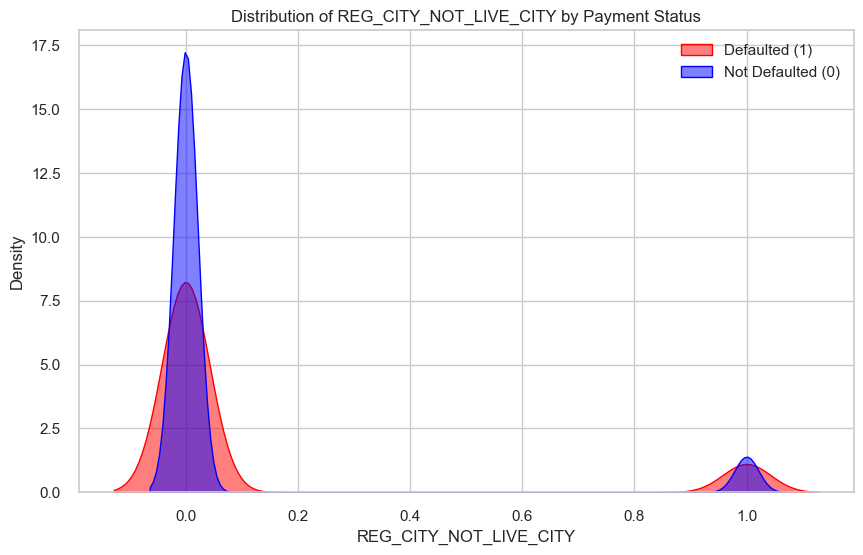

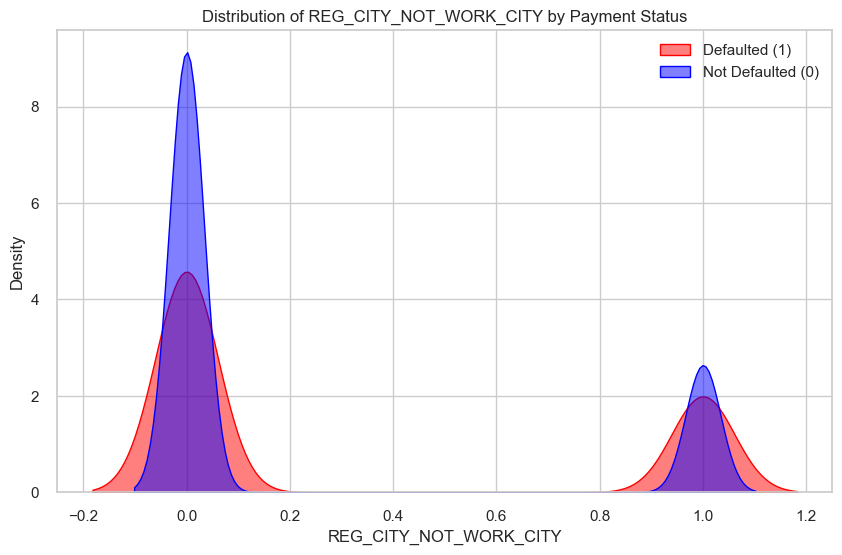

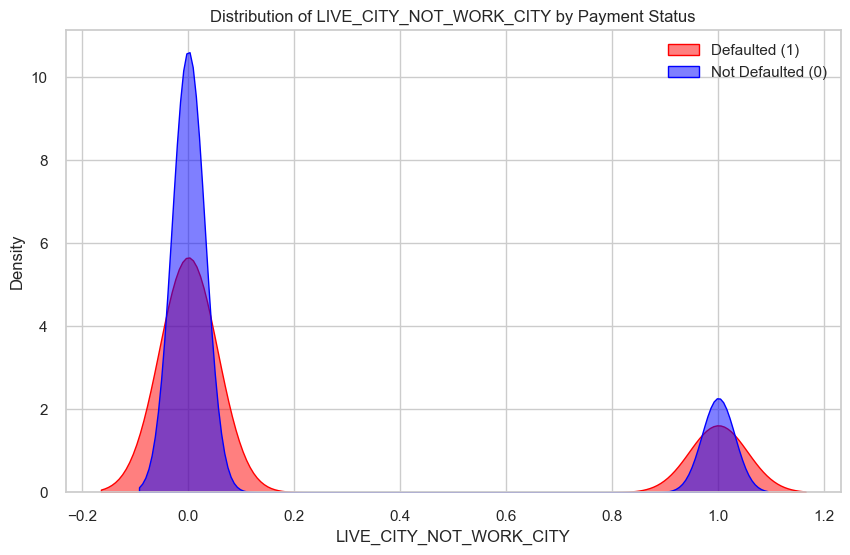

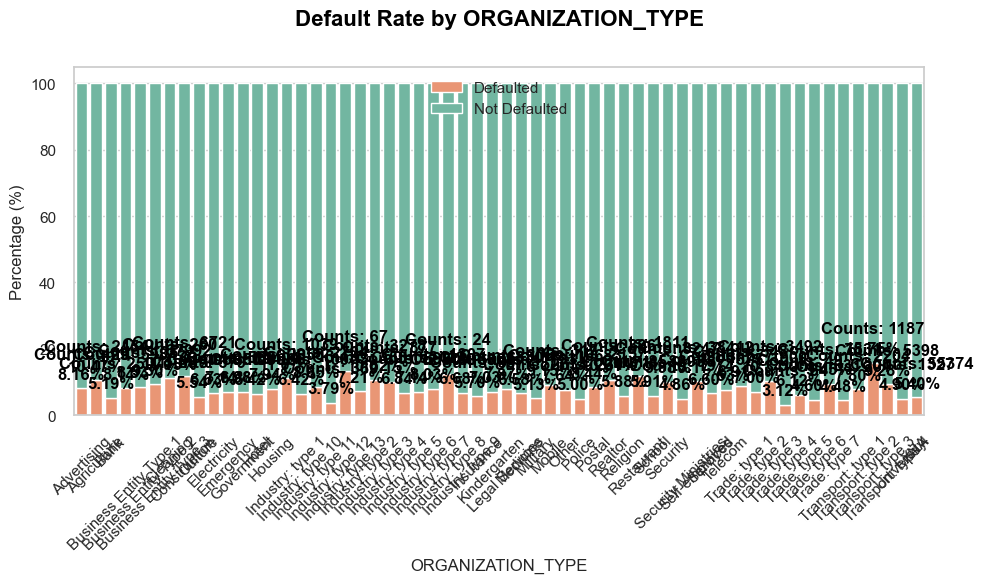

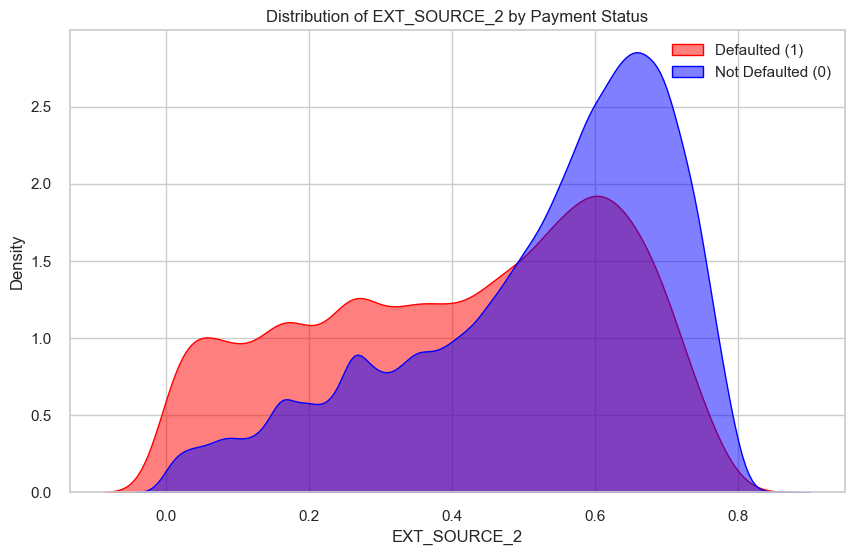

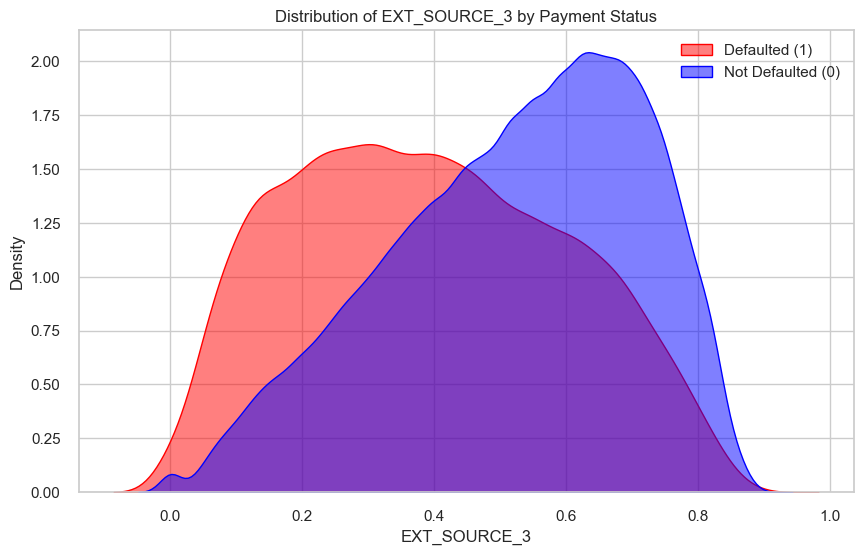

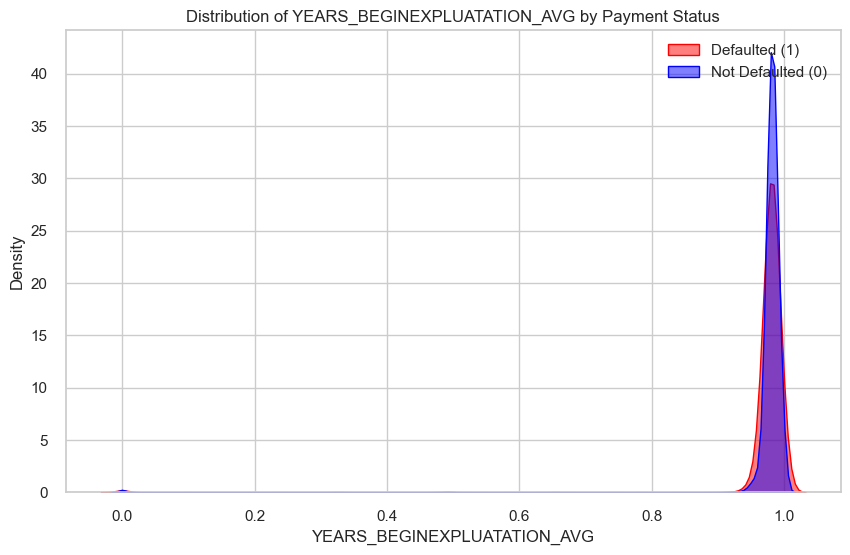

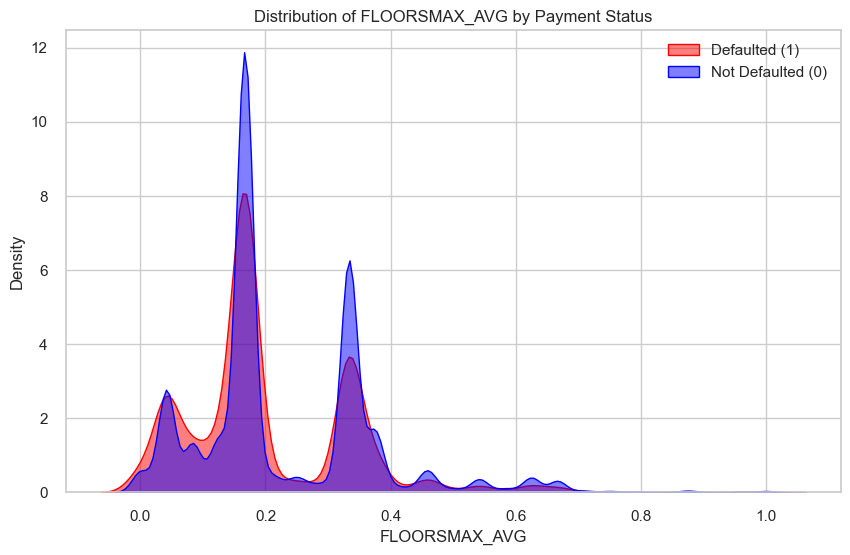

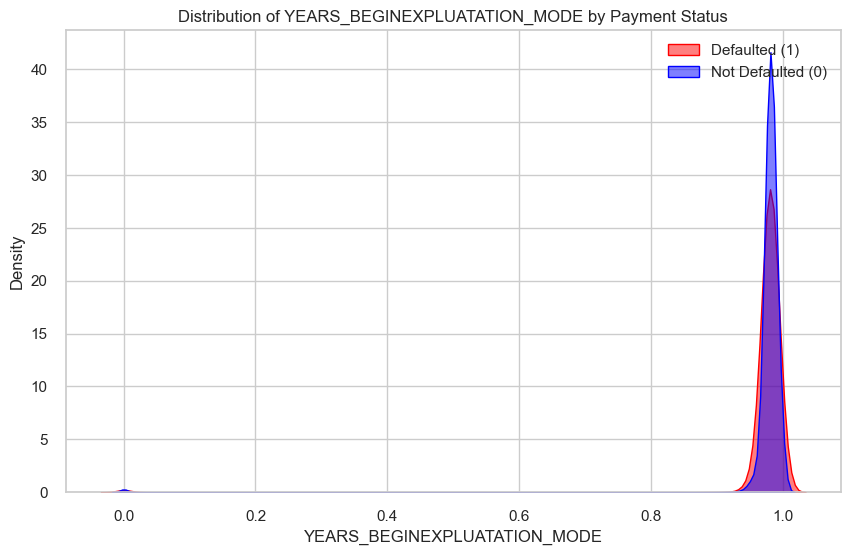

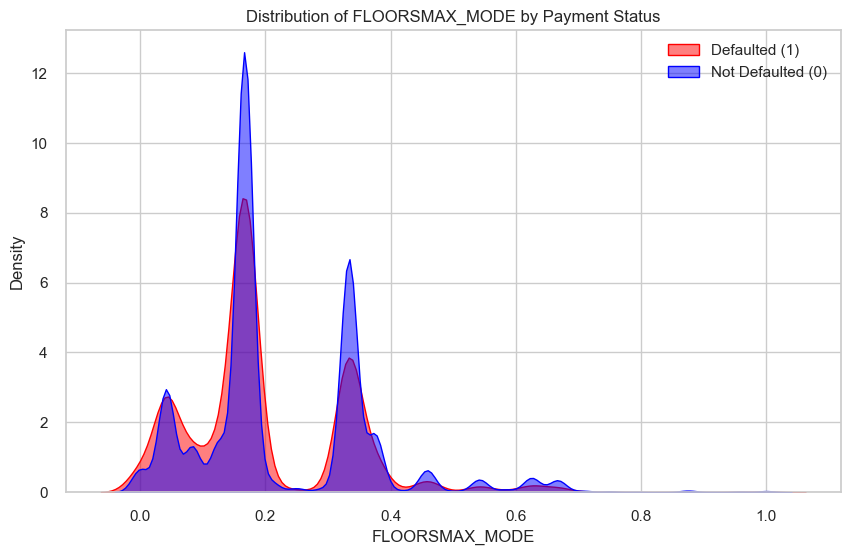

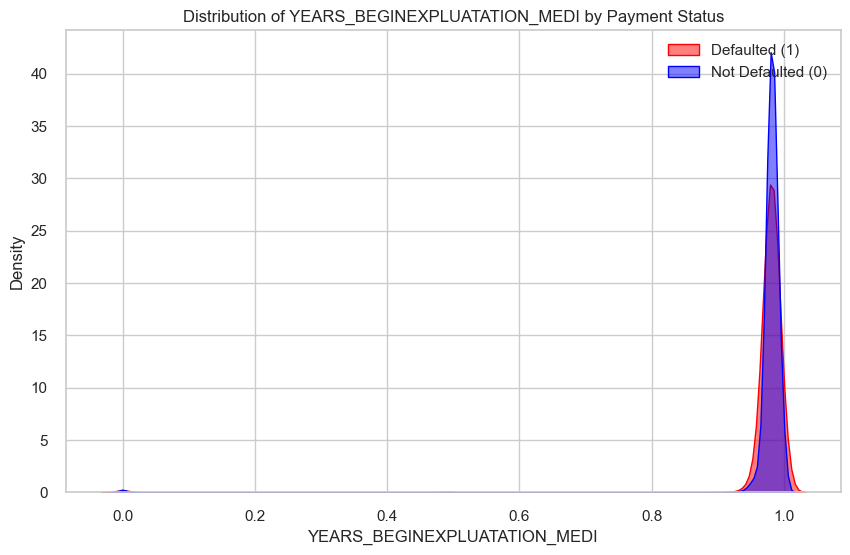

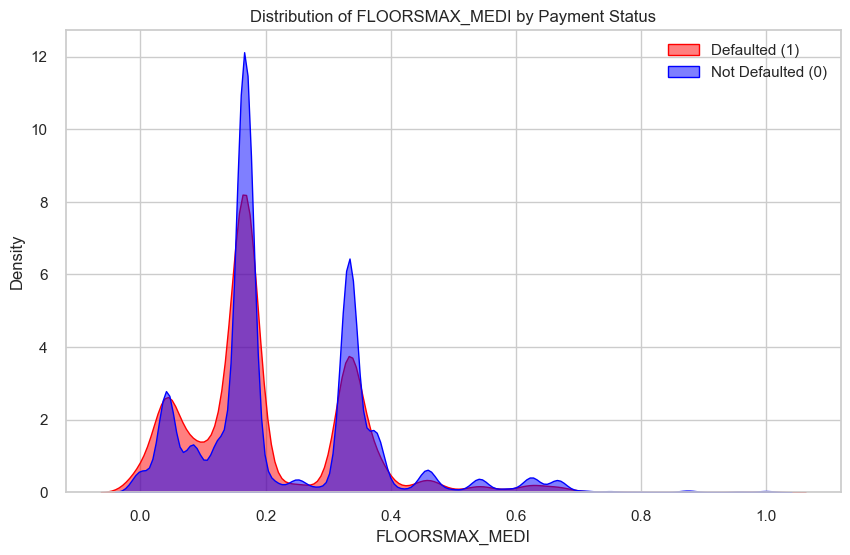

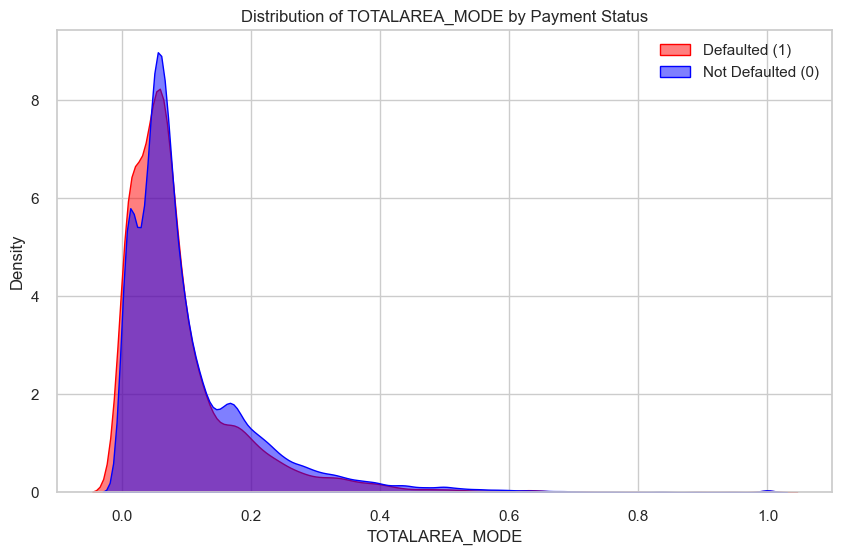

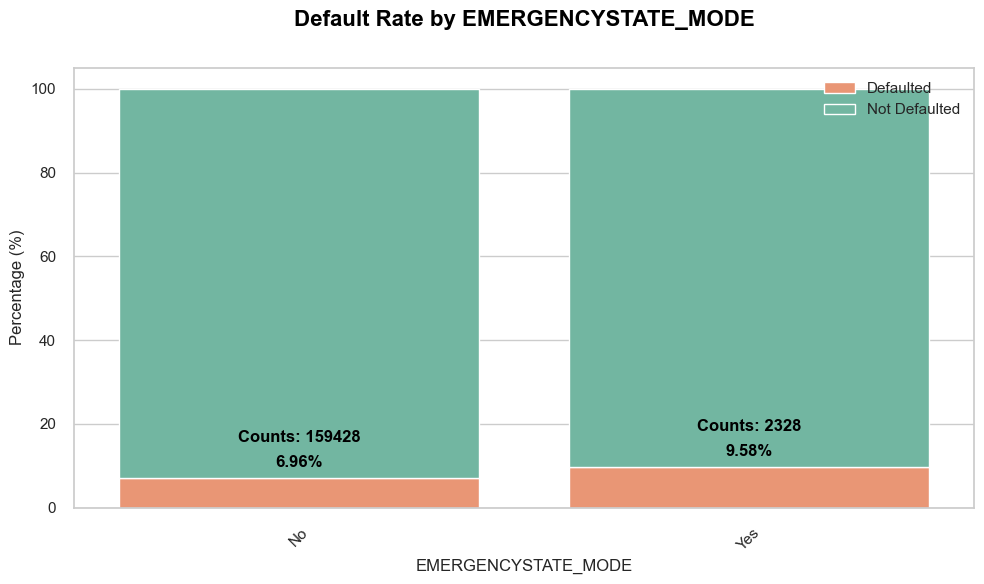

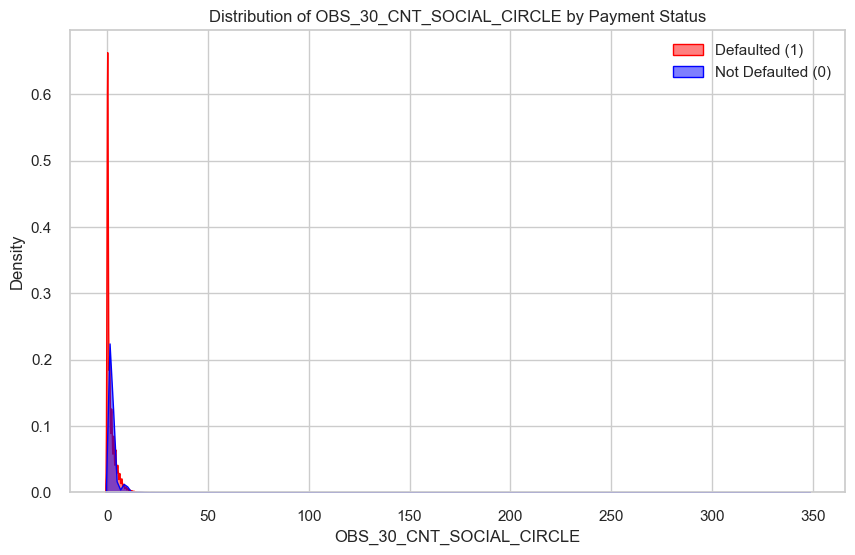

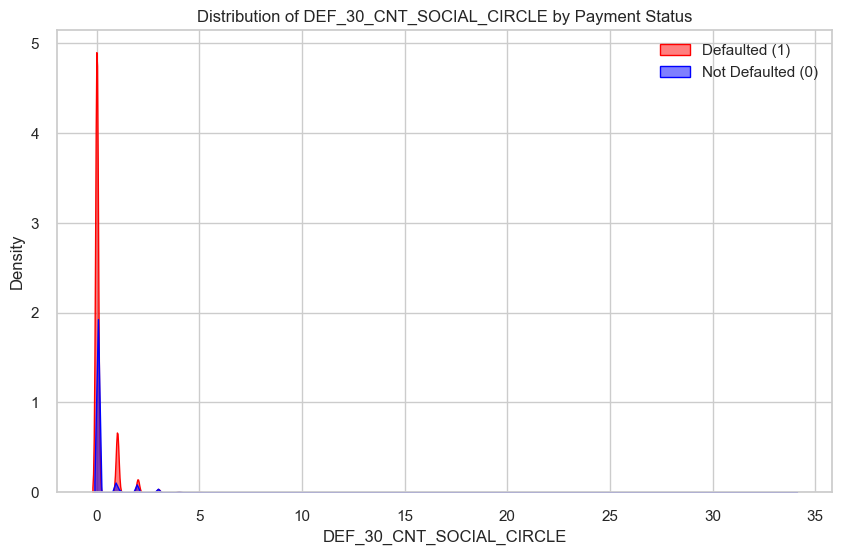

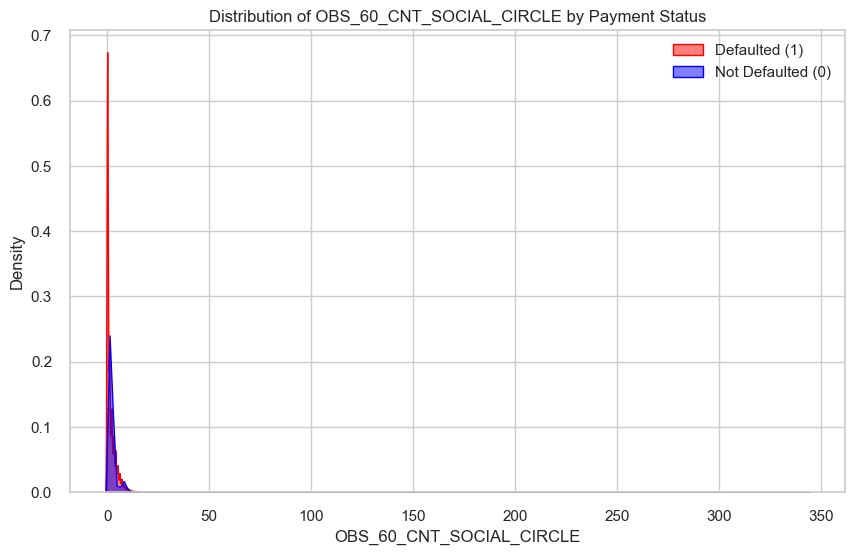

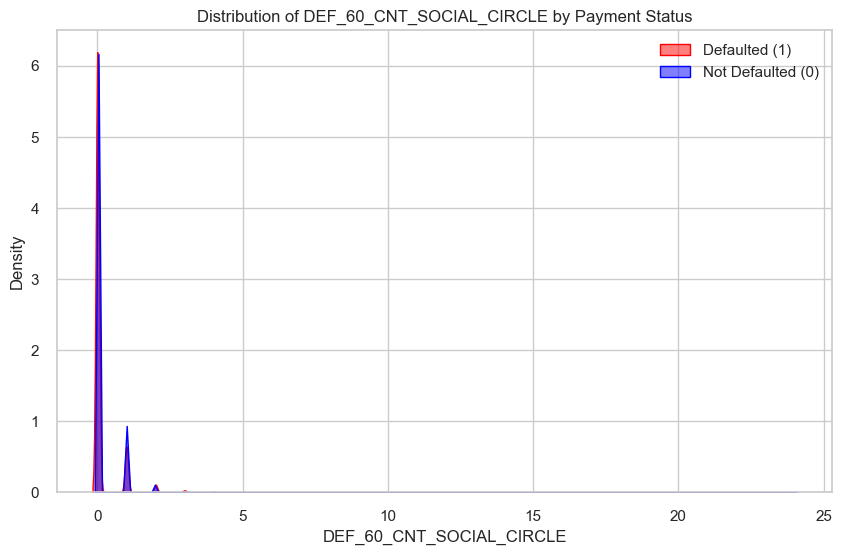

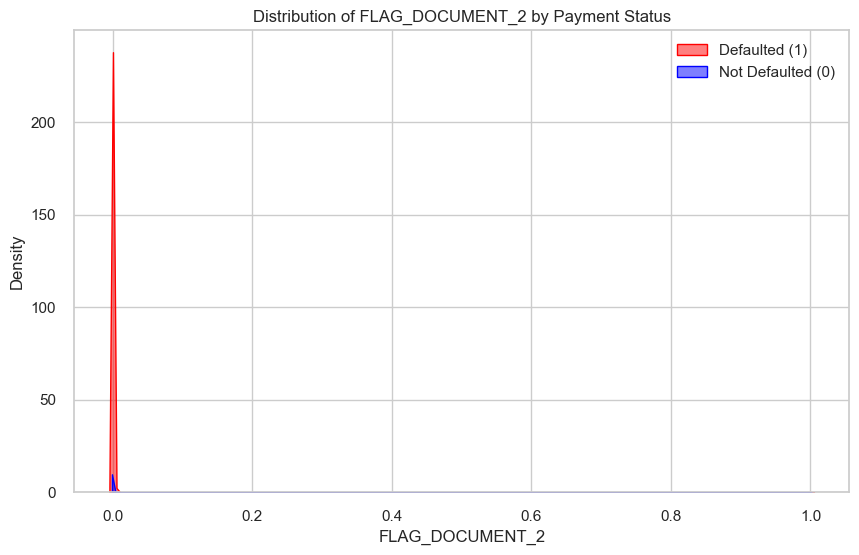

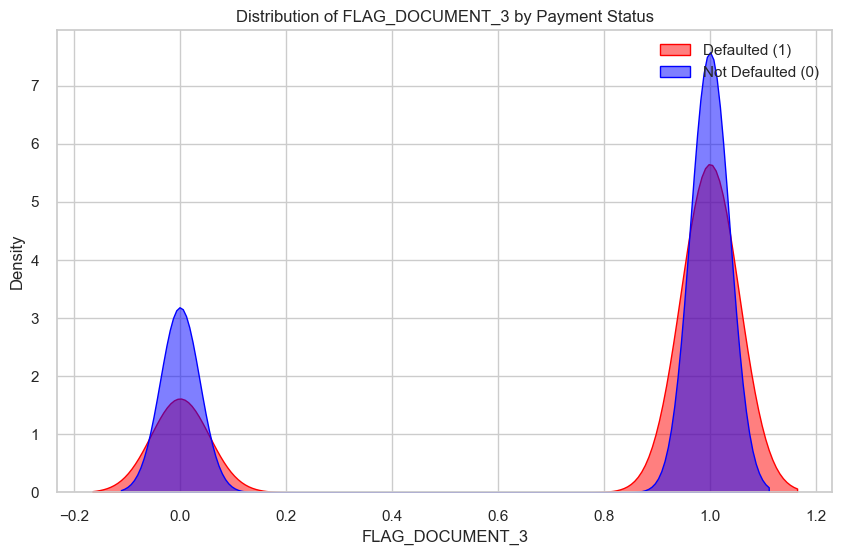

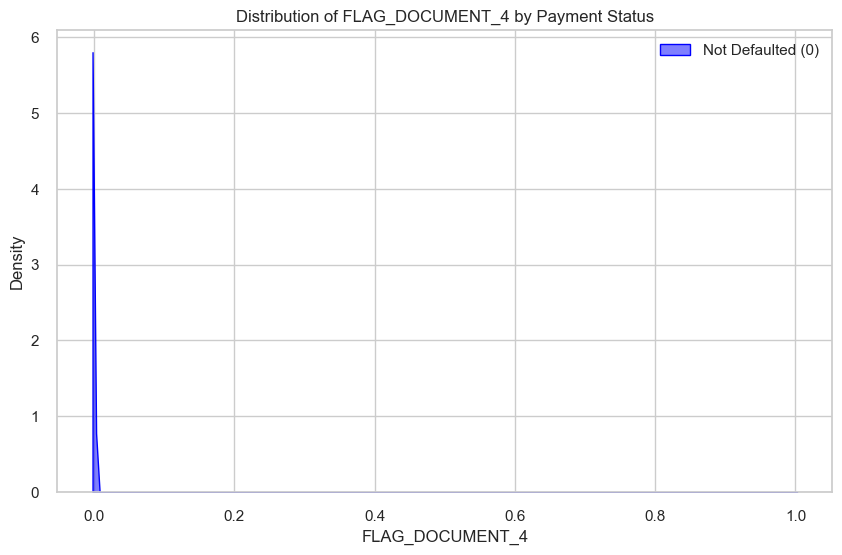

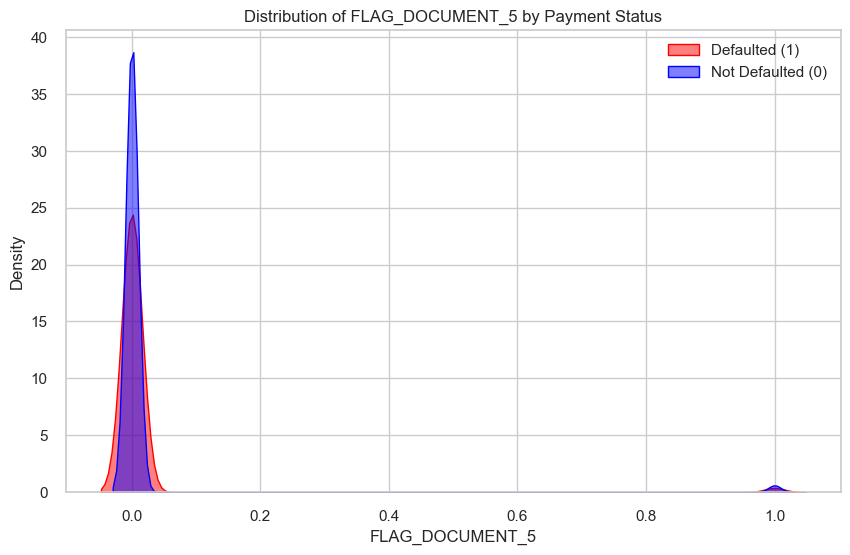

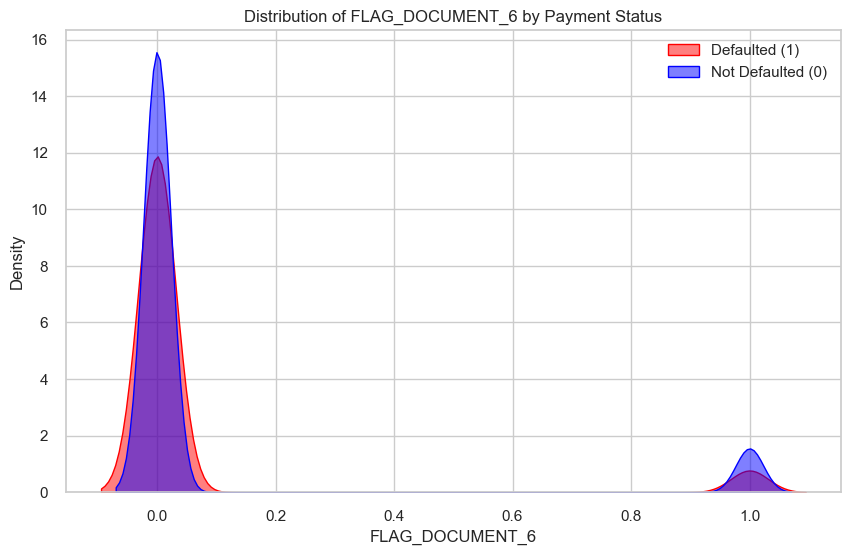

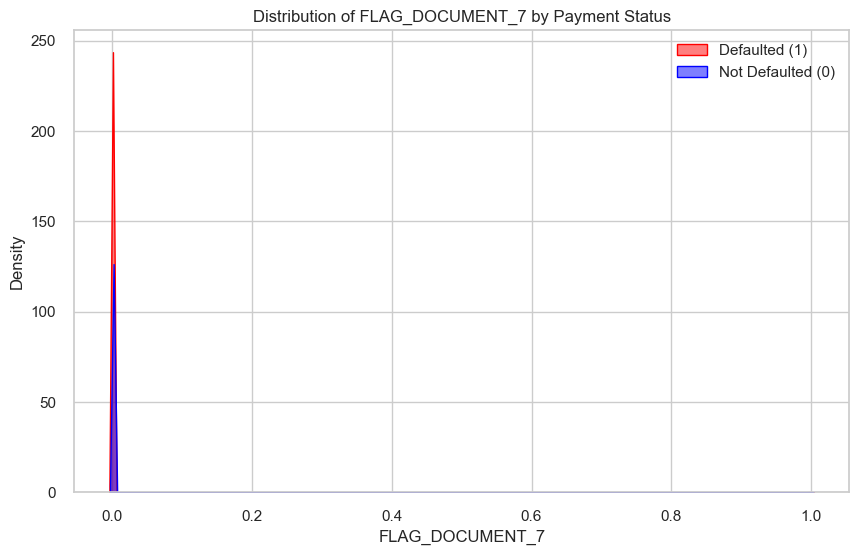

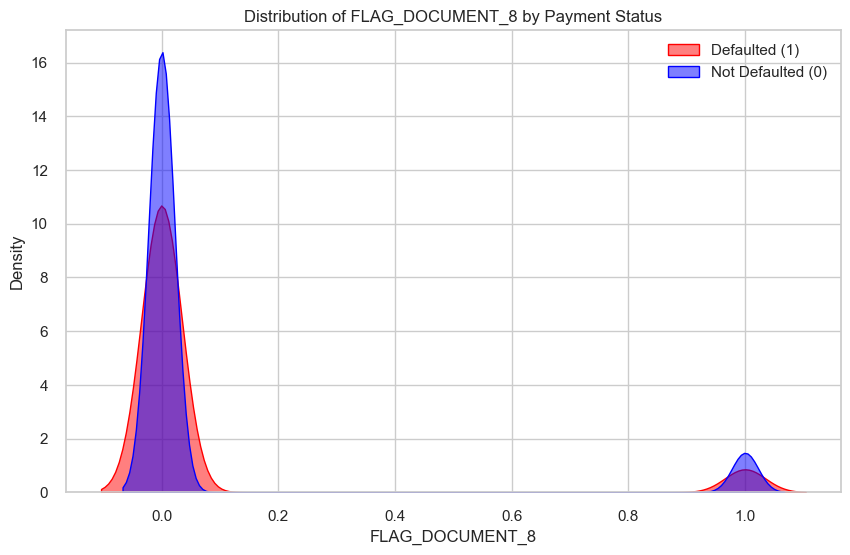

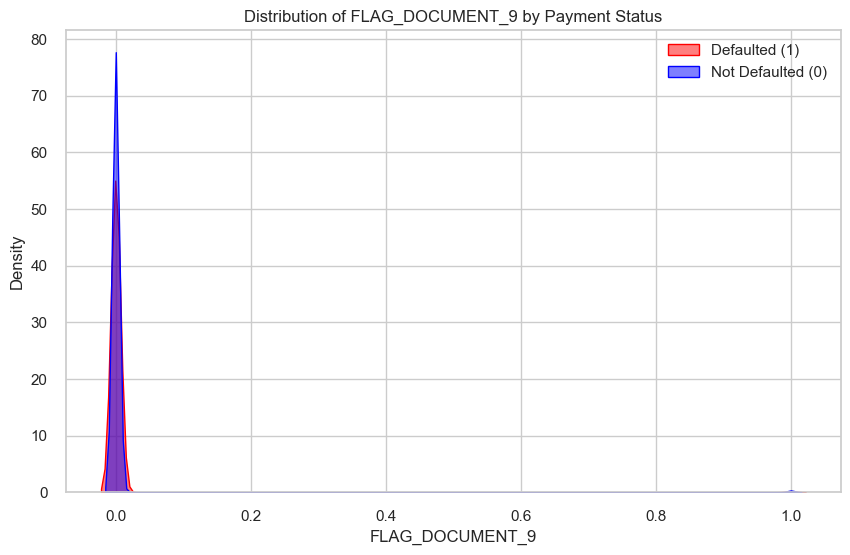

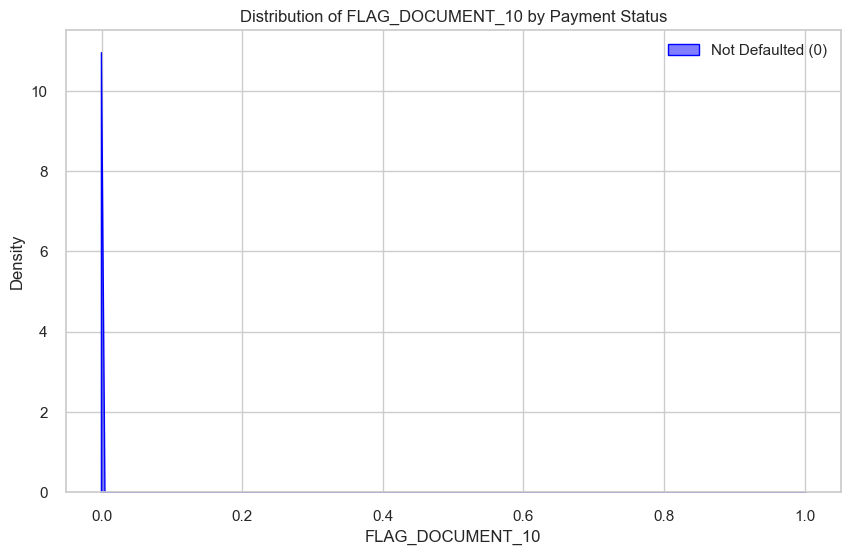

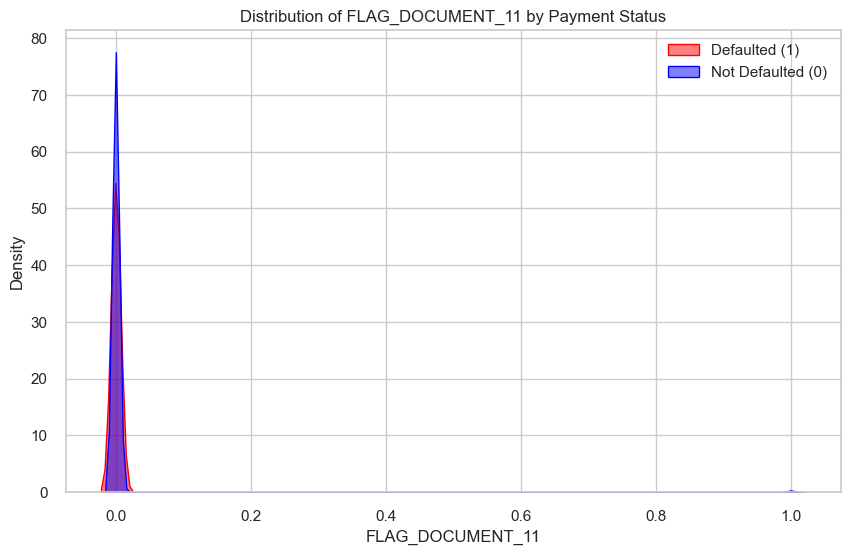

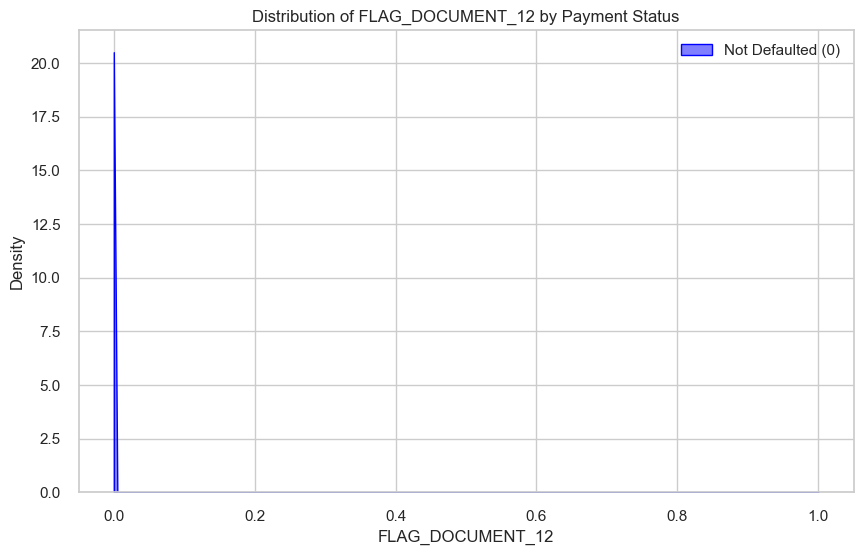

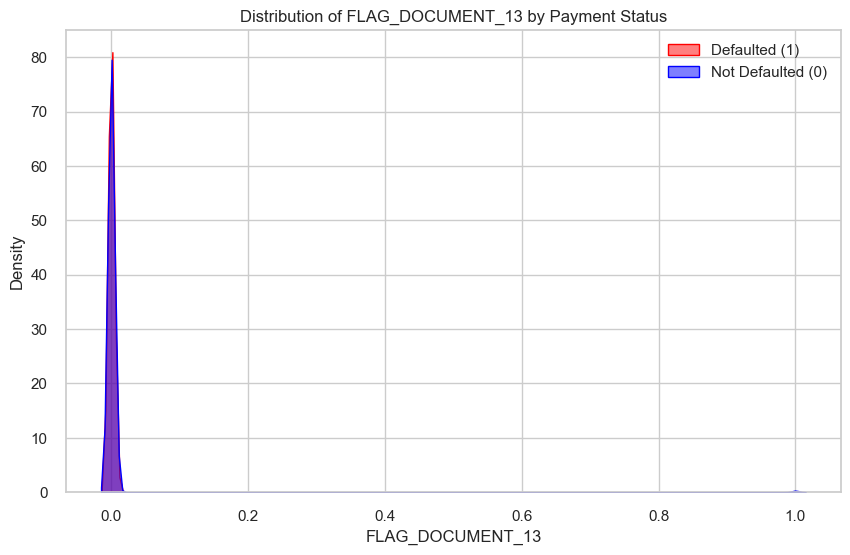

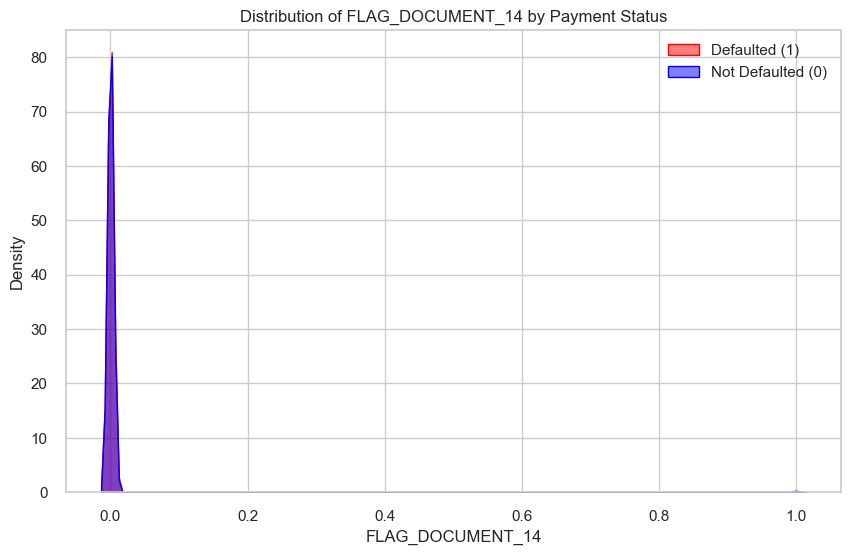

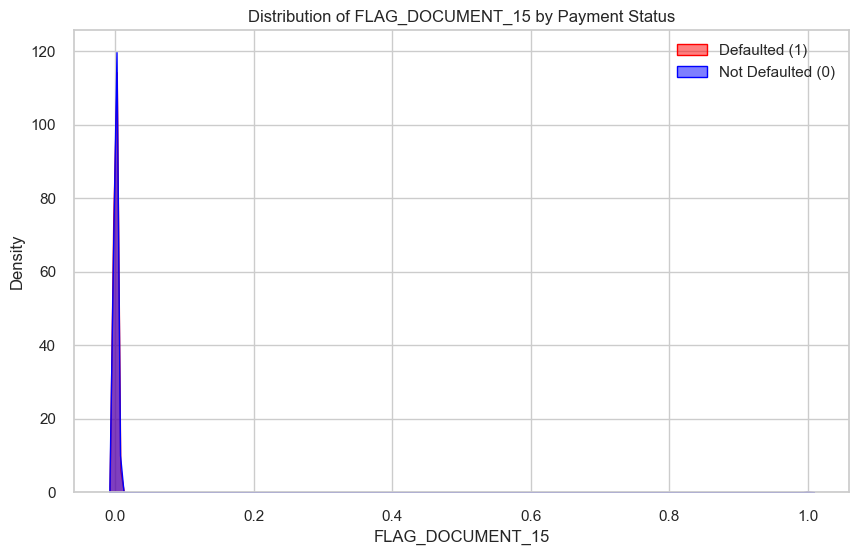

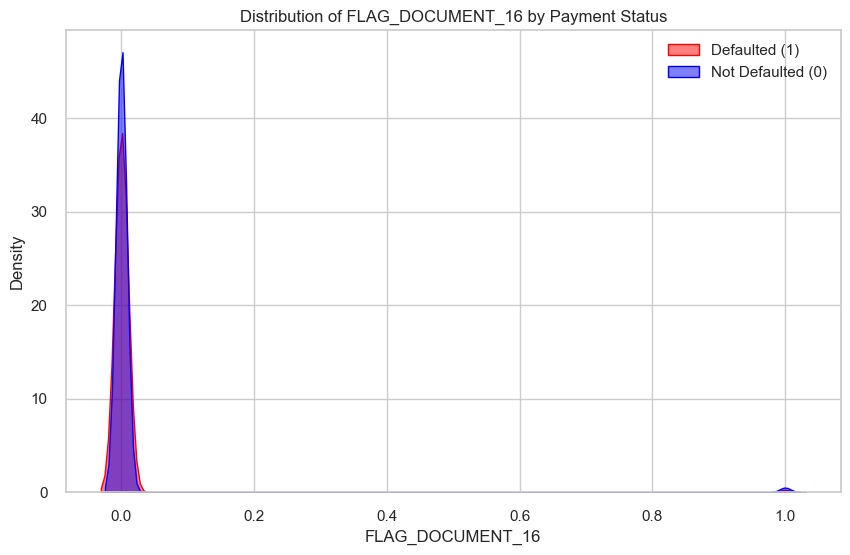

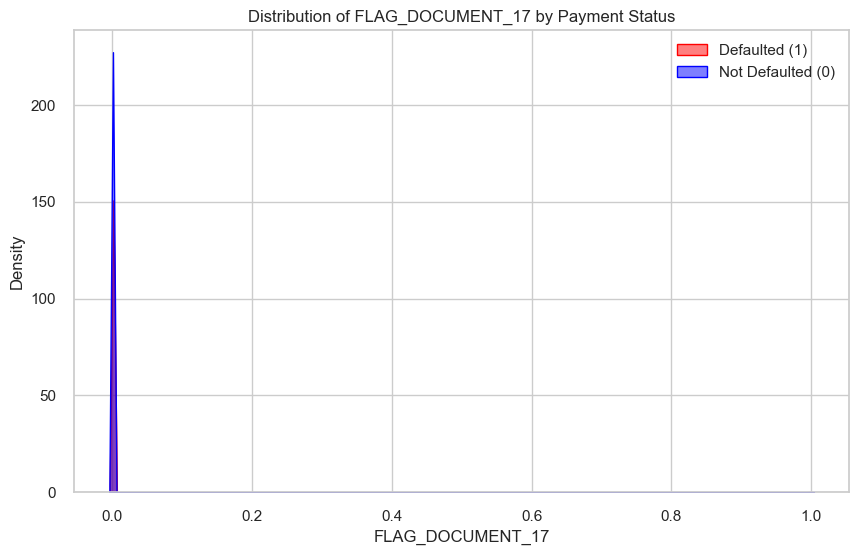

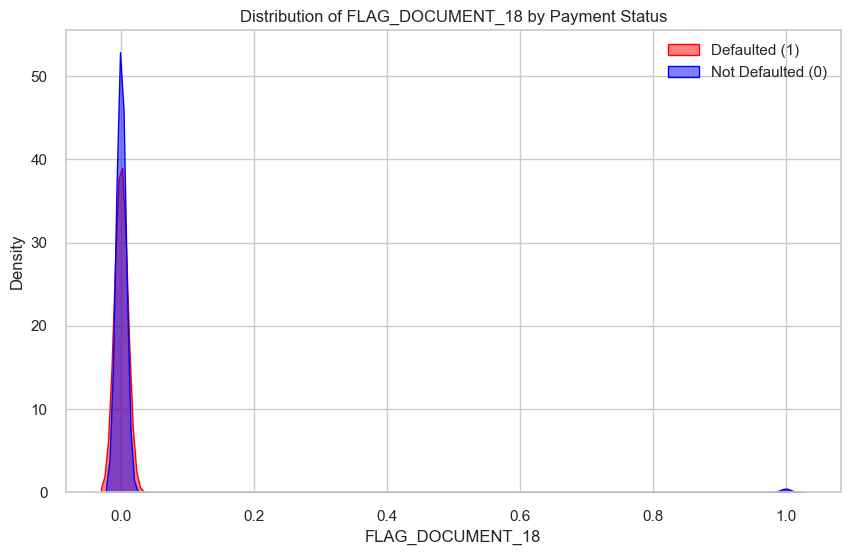

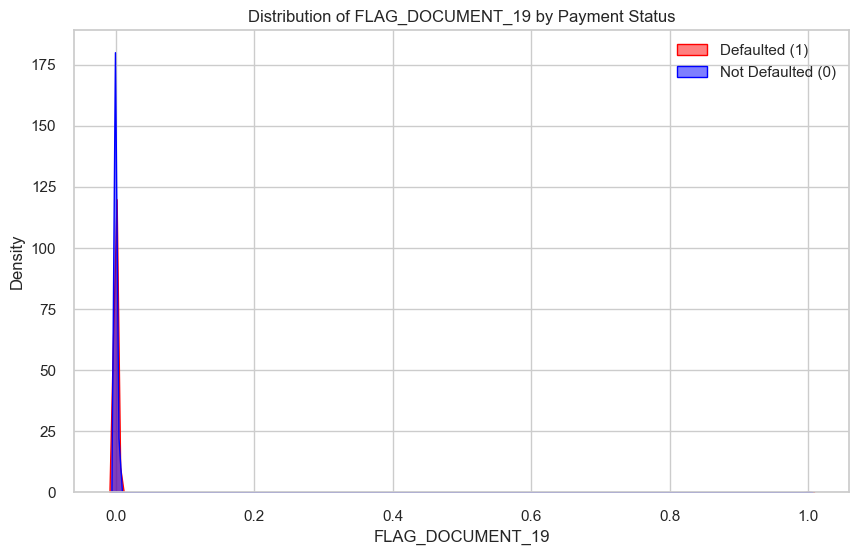

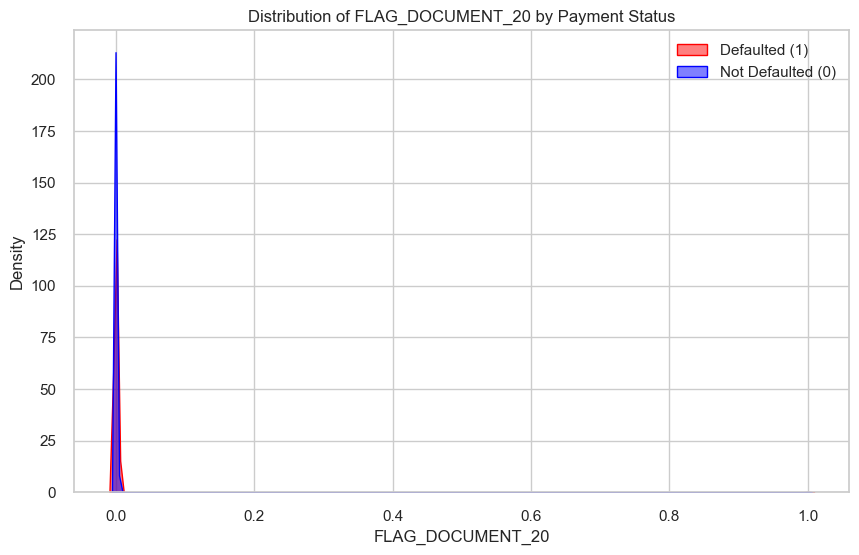

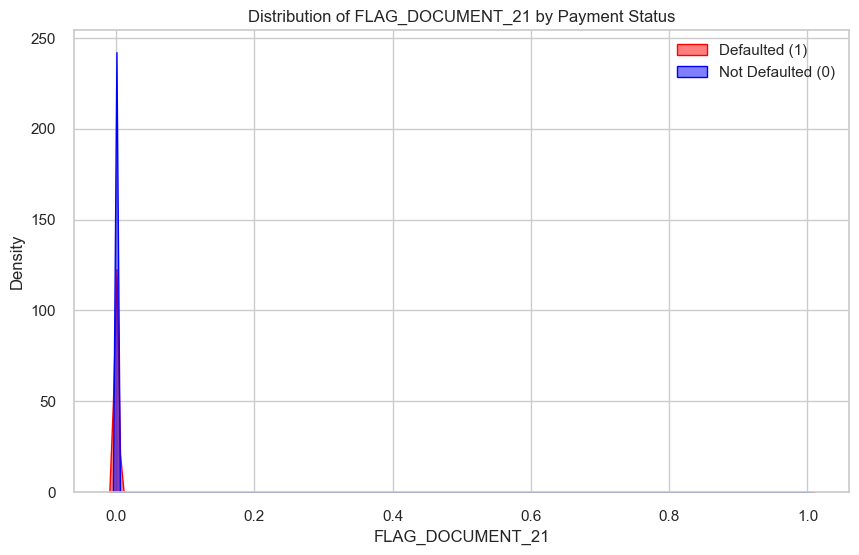

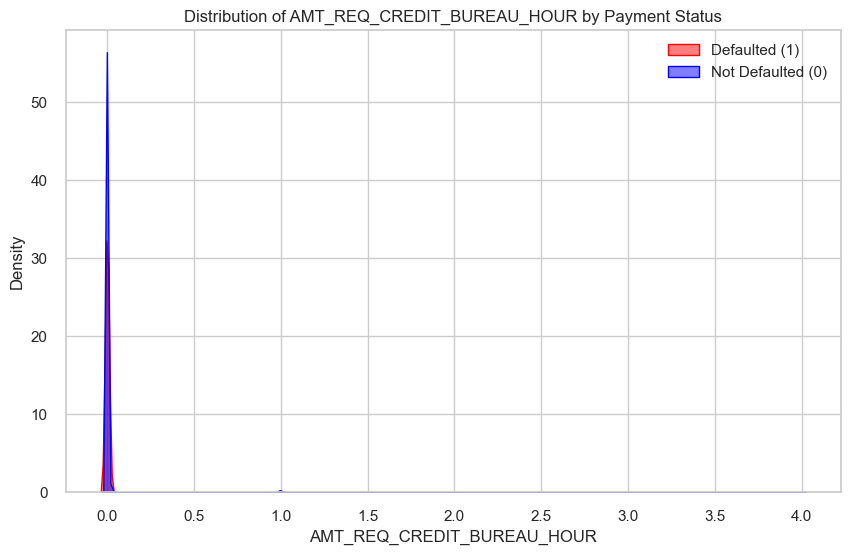

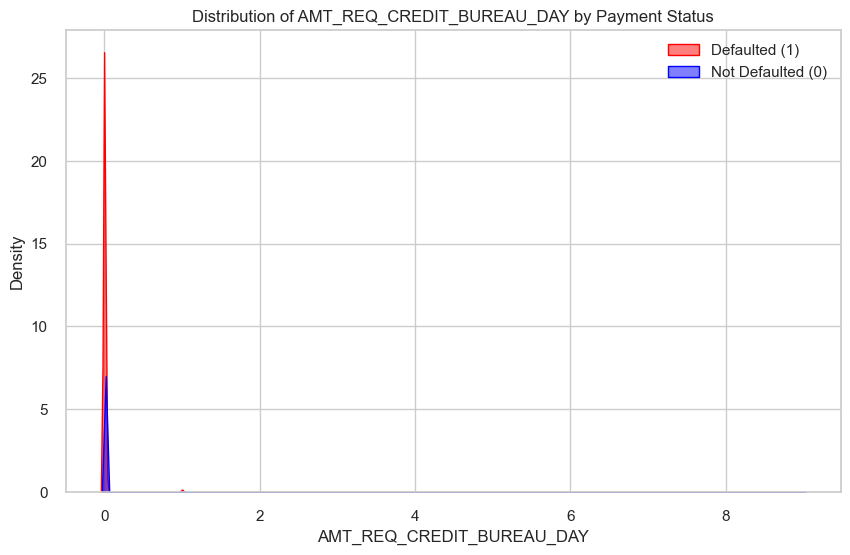

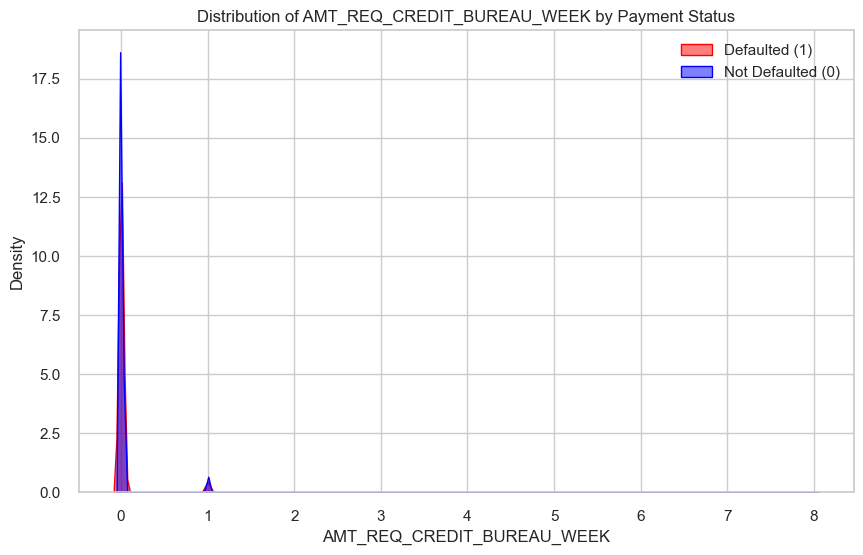

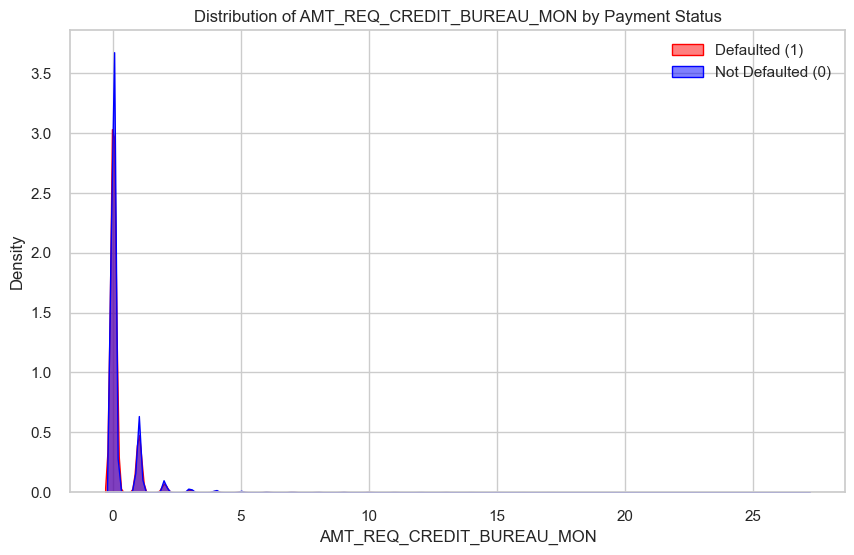

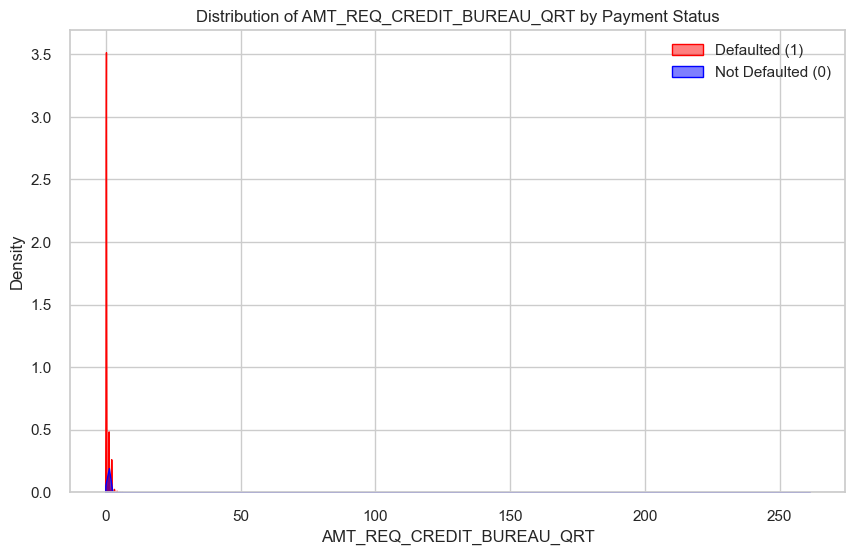

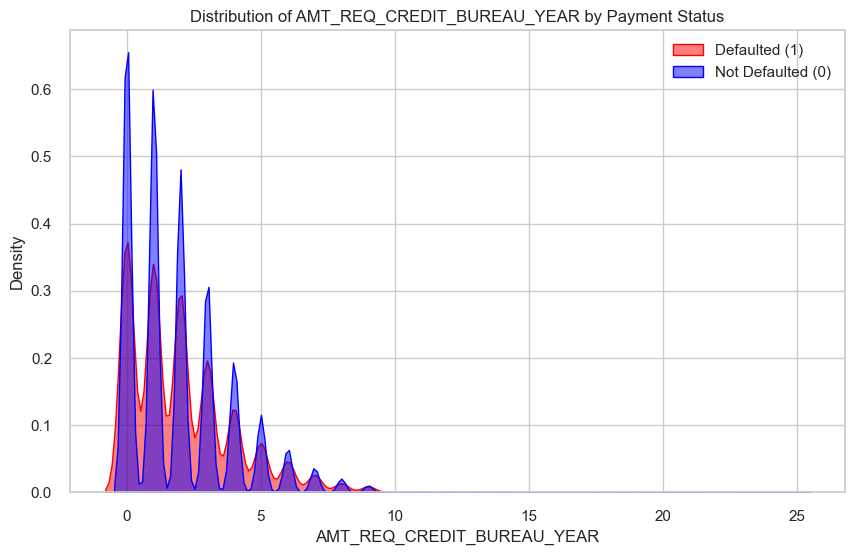

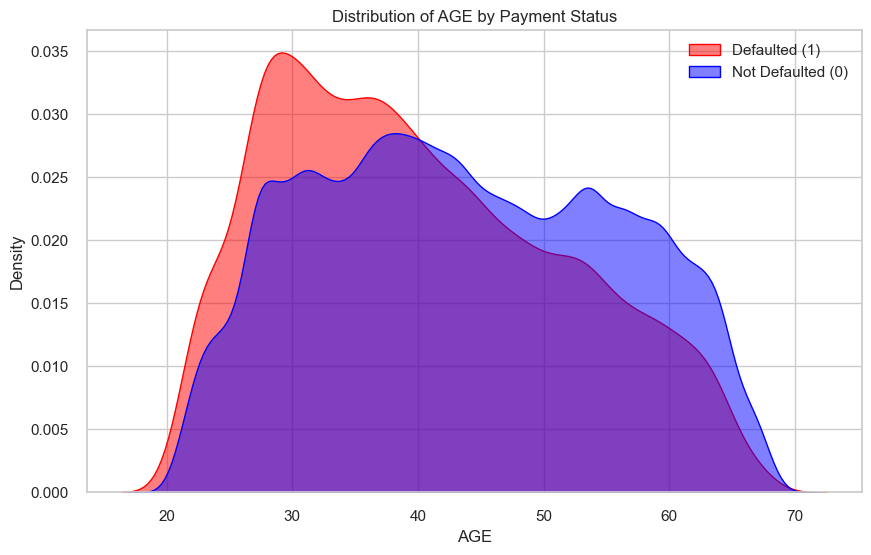

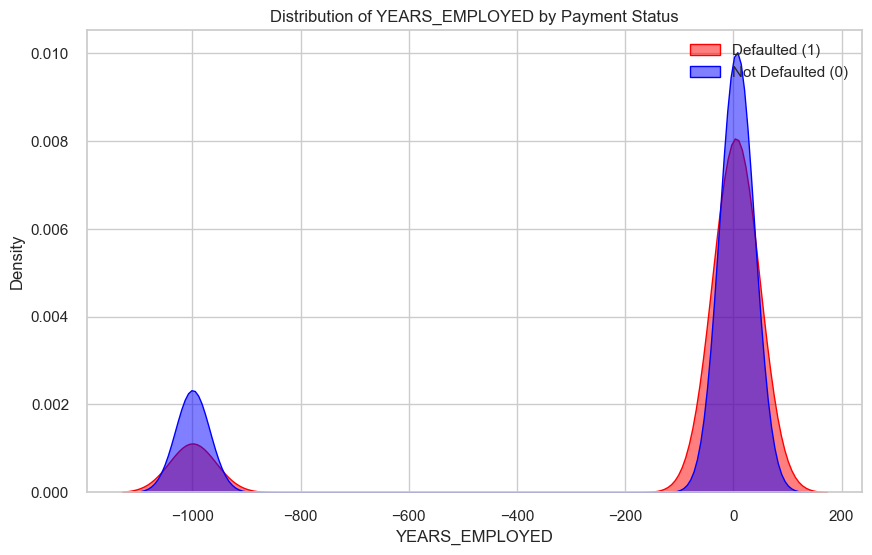

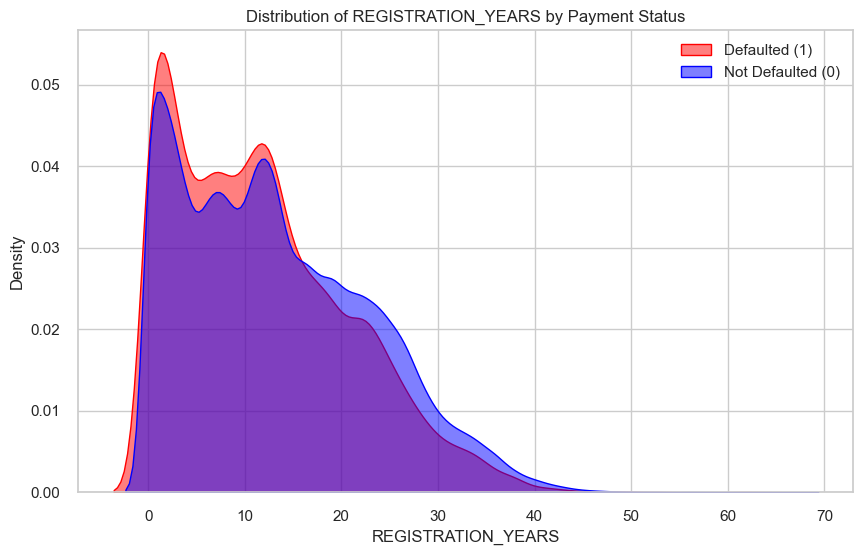

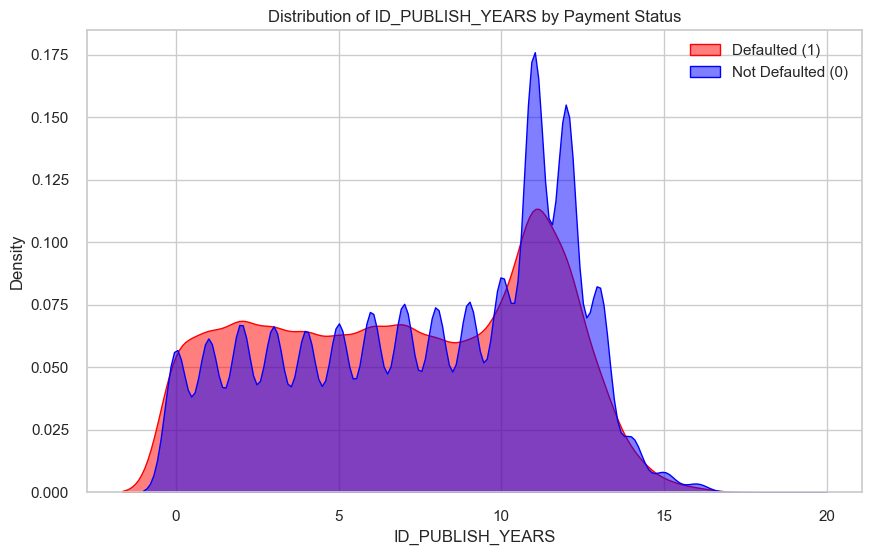

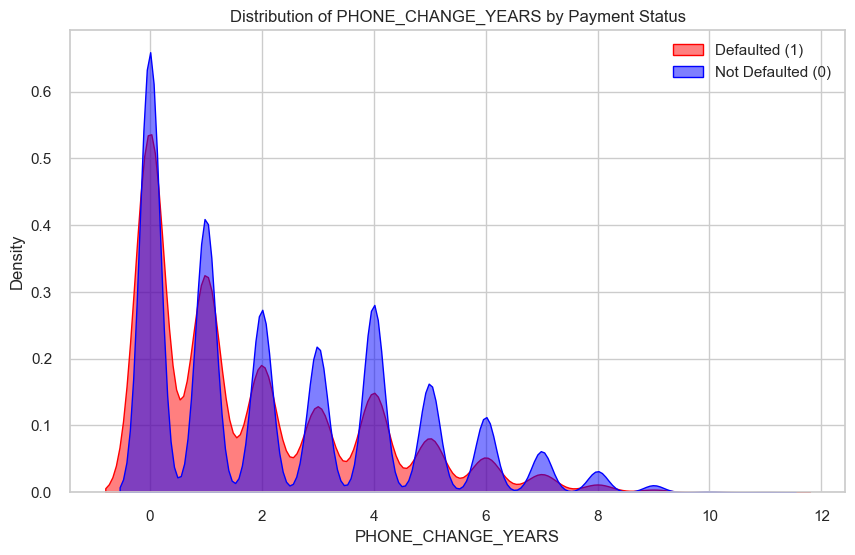

In [93]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

def eda_viz(data, features, target, ignore_features=None):
    if ignore_features is None:
        ignore_features = []

    # Filter out ignored features
    features = [feature for feature in features if feature not in ignore_features]
    
    for feature in features:
        plt.figure(figsize=(10, 6))
        
        if data[feature].dtype == 'object':
            # Group by feature and target to get counts
            count_data = data.groupby([feature, target]).size().reset_index(name='count')
            count_data[target] = count_data[target].map({0: 'Not Defaulted', 1: 'Defaulted'})  # Correct mapping

            # Creating pivot table
            pivot_table = count_data.pivot(index=feature, columns=target, values='count').fillna(0)
            pivot_table.columns = ['Defaulted', 'Not Defaulted']
            pivot_table['Total'] = pivot_table.sum(axis=1)

            # Calculate percentages
            pivot_table['Not Defaulted %'] = (pivot_table['Not Defaulted'] / pivot_table['Total']) * 100
            pivot_table['Defaulted %'] = (pivot_table['Defaulted'] / pivot_table['Total']) * 100

            # Creating stacked bar plot
            sns.set(style="whitegrid")
            
            # Define colors using Set2 palette
            palette = sns.color_palette('Set2')

            # Plotting Defaulted
            sns.barplot(x=pivot_table.index, y=pivot_table['Defaulted %'], color=palette[1], label='Defaulted')
            # Plotting Not Defaulted
            sns.barplot(x=pivot_table.index, y=pivot_table['Not Defaulted %'], bottom=pivot_table['Defaulted %'], color=palette[0], label='Not Defaulted')

            plt.xlabel(feature)
            plt.ylabel('Percentage (%)')
            plt.title(f'Default Rate by {feature}', color='black', fontsize=16, loc='center', weight='bold', pad=30)

            # Adding text annotations for percentage & total counts
            for index in pivot_table.index:
                plt.text(index, pivot_table.loc[index, 'Defaulted %'] + 2, f"{pivot_table.loc[index, 'Defaulted %']:.2f}%", ha='center', va='bottom', color='black', weight='bold')
                plt.text(index, pivot_table.loc[index, 'Defaulted %'] + 8, f"Counts: {pivot_table.loc[index, 'Total']}", ha='center', va='bottom', color='black', weight='bold')

            plt.legend()
            plt.xticks(rotation=45)
            plt.tight_layout()
            plt.show()

        else:
            # Numerical feature visualization
            sns.kdeplot(data[data[target] == 1][feature], label='Defaulted (1)', fill=True, color='red', alpha=0.5)
            sns.kdeplot(data[data[target] == 0][feature], label='Not Defaulted (0)', fill=True, color='blue', alpha=0.5)
            plt.title(f'Distribution of {feature} by Payment Status')
            plt.xlabel(feature)
            plt.ylabel('Density')
            plt.legend()

eda_viz(data, data.columns.to_list(), 'TARGET', ignore_feat)

# Setup Experiment with Pycaret (AutoML Library)

In [9]:
from pycaret.classification import *

# init class
exp = ClassificationExperiment()

# init setup on exp
exp.setup(data,
          target = 'TARGET',
          session_id=333,
          
          ignore_features = ignore_feat,
          numeric_features = numerical_feat,
          categorical_features = categorical_feat,
          ordinal_features = ordinal_encoding,
          
          preprocess = True,
          numeric_imputation = 'median',
          categorical_imputation = 'mode',
          fix_imbalance = True,
          transformation = True,
          normalize = True,
          normalize_method = 'minmax',
          
          feature_selection = True,
          feature_selection_estimator = 'rf',
          remove_multicollinearity = True,
          multicollinearity_threshold = 0.8,
          
          profile = True,
          profile_kwargs = {'title' : 'EDA',
                            'minimal' : True,
                            'correlations' : ['pearson','spearman'],
                            'progress_bar' : True,
                           },
          
          fold = 5,
          fold_strategy = 'kfold'
         )

Loading profile... Please Wait!
Profiler Failed. No output to show, continue with modeling.


# Train Models

Training Logistics Regression, Decision Tree, & Random Forest Classifier. Comparing them based on performance Metrics.

In [10]:
# compare models

best = exp.compare_models(sort='Recall', include = ['lr', 'dt', 'rf'], n_select=3)

In [11]:
train_metrics = exp.pull()
train_metrics

Model  Accuracy     AUC  Recall   Prec.      F1  \
lr       Logistic Regression    0.7890  0.7109  0.4554  0.1804  0.2584   
dt  Decision Tree Classifier    0.8461  0.5361  0.1663  0.1342  0.1485   
rf  Random Forest Classifier    0.9091  0.6519  0.0463  0.2123  0.0759   

     Kappa     MCC  TT (Sec)  
lr  0.1614  0.1850    30.638  
dt  0.0650  0.0654    30.190  
rf  0.0484  0.0645    32.172

The initial training of the model produced low metric scores with CV from the validation (test) set, prompting the need for tuning. Several strategies were implemented to improve performance, such as **Random Search & Optimize Recall**.

# Tune Model

In [12]:
best

[LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                    intercept_scaling=1, l1_ratio=None, max_iter=1000,
                    multi_class='auto', n_jobs=None, penalty='l2',
                    random_state=333, solver='lbfgs', tol=0.0001, verbose=0,
                    warm_start=False),
 DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                        max_depth=None, max_features=None, max_leaf_nodes=None,
                        min_impurity_decrease=0.0, min_samples_leaf=1,
                        min_samples_split=2, min_weight_fraction_leaf=0.0,
                        monotonic_cst=None, random_state=333, splitter='best'),
 RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                        criterion='gini', max_depth=None, max_features='sqrt',
                        max_leaf_nodes=None, max_samples=None,
                        min_impurity_decrease=0.0, min_samples_leaf=1,

In [13]:
lr = best[0]
dt = best[1]
rf = best[2]

## Tune Logistic Regression

In [65]:
# tune logistics regression mode

tuned_lr = exp.tune_model(lr,
                          optimize='Recall',
                          return_train_score=True,
                          fold=3,
                          n_iter=13,
                          search_library='optuna',
                          custom_grid={'C': [0.001, 0.005, 0.01, 0.1, 1, 10, 100],
                                       'solver': ['liblinear', 'saga'],
                                       'penalty': ['l2']})

## Tune Decision Tree

In [14]:
tuned_dt = exp.tune_model(dt, optimize='Recall', return_train_score=True, fold=3)

Fitting 3 folds for each of 10 candidates, totalling 30 fits


## Tune Random Forest

In [25]:
tuned_rf = exp.tune_model(rf, optimize='Recall', return_train_score=True, fold=3, n_iter=15)

Fitting 3 folds for each of 15 candidates, totalling 45 fits


### Compare Tuned Model Metrics

In [103]:
# extract all 3 tuned metrics (sequential one by one pull)
#tuned_lr_metrics = exp.pull()
#tuned_dt_metrics = exp.pull()
#tuned_rf_metrics = exp.pull()

# List of metrics DataFrames and their prefixes
metrics_list = [
    (tuned_dt_metrics, "tuned_dt"),
    (tuned_rf_metrics, "tuned_rf"),
    (tuned_lr_metrics, "tuned_lr")
]

# Initialize an empty list to store the extracted means
means_list = []

# Loop through each metrics DataFrame and extract means
for metrics, prefix in metrics_list:
    means = metrics.loc[[("CV-Train", "Mean"), ("CV-Val", "Mean")]].rename(
        index={
            ("CV-Train", "Mean"): f"{prefix}_CV-Train_Mean", 
            ("CV-Val", "Mean"): f"{prefix}_CV-Val_Mean"
        }
    )
    
    # Add the model name to the MultiIndex
    means.index = pd.MultiIndex.from_tuples([(prefix, idx) for idx in means.index])

    means_list.append(means)

# Combine all means into one DataFrame
tuned_metrics = pd.concat(means_list)

# Display the combined DataFrame
tuned_metrics.sort_values(by=['AUC', 'Recall'], ascending=[False, False])

Accuracy     AUC  Recall   Prec.      F1   Kappa  \
tuned_lr (CV-Train, Mean)    0.6976  0.7025  0.5855  0.1495  0.2382  0.1257   
         (CV-Val, Mean)      0.6982  0.7024  0.5860  0.1499  0.2387  0.1264   
tuned_dt (CV-Train, Mean)    0.5017  0.5520  0.6120  0.0957  0.1655  0.0300   
         (CV-Val, Mean)      0.5017  0.5520  0.6120  0.0957  0.1655  0.0300   
tuned_rf (CV-Train, Mean)    0.5017  0.5520  0.6120  0.0957  0.1655  0.0300   
         (CV-Val, Mean)      0.5017  0.5520  0.6120  0.0957  0.1655  0.0300   

                              MCC  
tuned_lr (CV-Train, Mean)  0.1717  
         (CV-Val, Mean)    0.1724  
tuned_dt (CV-Train, Mean)  0.0567  
         (CV-Val, Mean)    0.0567  
tuned_rf (CV-Train, Mean)  0.0567  
         (CV-Val, Mean)    0.0567

as our business **objective Building a predictive model** that can identify potential clients who can repay loans, as well as classify clients at risk of becoming defaulters.

our business metrics should be default rate, but we also want to correctly identify non-defaults (true negatives).

thus our model metrics should be AUC as it suggests better overall performance in distinguishing between defaulters and non-defaulters.

we are gonna use `Logistic Regression` as it has the highest `AUC`, While the recall is slightly lower, the trade-off might be acceptable if the focus is on overall predictive power.

### Analyze Tuned Model

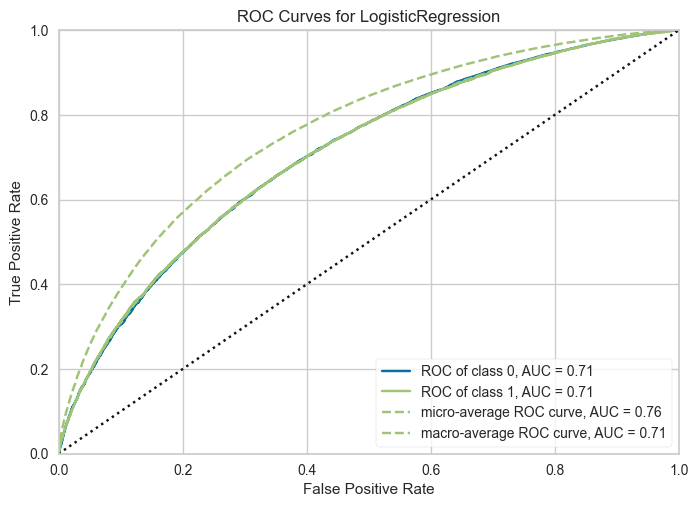

In [106]:
exp.plot_model(tuned_lr, plot='auc')

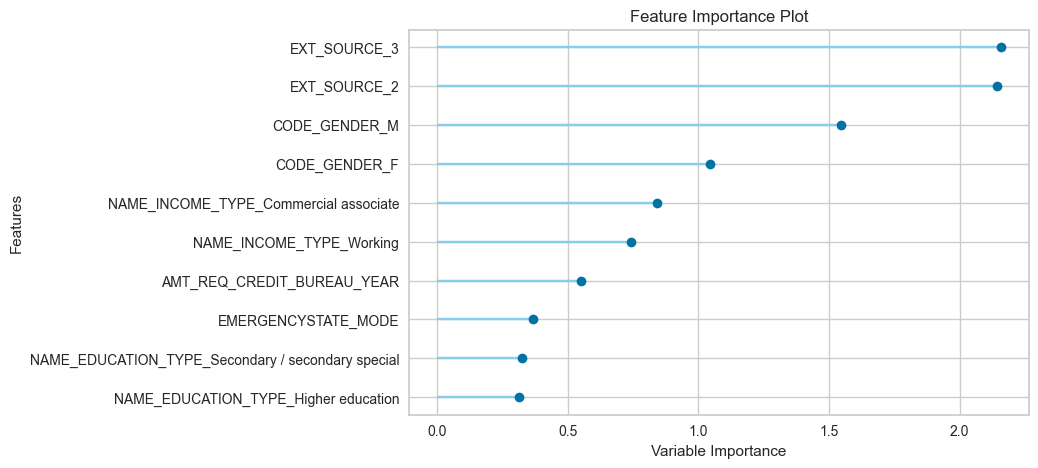

In [104]:
exp.plot_model(tuned_lr, plot='feature')

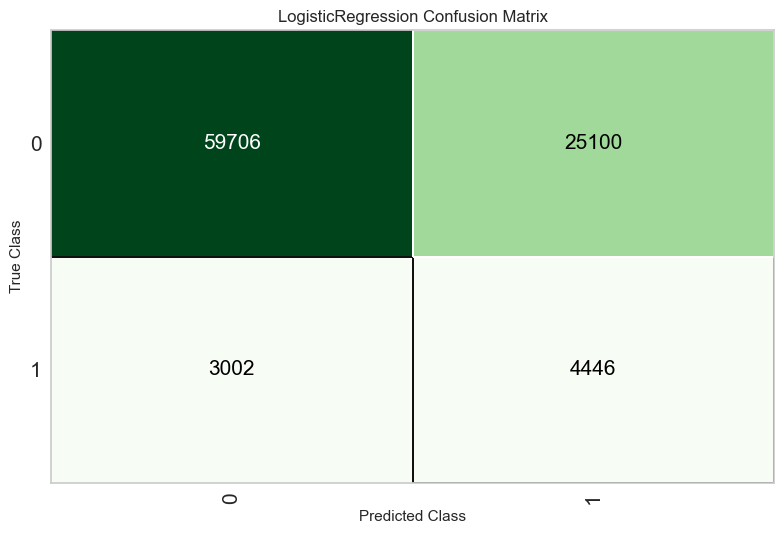

In [201]:
exp.plot_model(tuned_lr, plot='confusion_matrix')


from confusion matrix we can interpret recall, which is 59.6% means that the model misses about 40.4% of actual defaults (3,002 cases). This could be critical, especially if the consequences of failing to identify a defaulting customer are significant

however considering our AUC of 0.70 indicates a reasonably good model for risk assessment, helping to identify potential defaulters effectively. This can help in making informed lending decisions, allowing the business to target high-risk customers appropriately.

## Testing on unseen data

In [127]:
# load test data

new_data = pd.read_csv("home-credit-default-risk/application_test.csv")
new_data.head(2)

SK_ID_CURR NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR FLAG_OWN_REALTY  \
0      100001         Cash loans           F            N               Y   
1      100005         Cash loans           M            N               Y   

   CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  AMT_GOODS_PRICE  \
0             0          135000.0    568800.0      20560.5         450000.0   
1             0           99000.0    222768.0      17370.0         180000.0   

   ... FLAG_DOCUMENT_18 FLAG_DOCUMENT_19 FLAG_DOCUMENT_20 FLAG_DOCUMENT_21  \
0  ...                0                0                0                0   
1  ...                0                0                0                0   

  AMT_REQ_CREDIT_BUREAU_HOUR  AMT_REQ_CREDIT_BUREAU_DAY  \
0                        0.0                        0.0   
1                        0.0                        0.0   

   AMT_REQ_CREDIT_BUREAU_WEEK  AMT_REQ_CREDIT_BUREAU_MON  \
0                         0.0                        0.0   
1                         0.0                        0.0   

   AMT_REQ_CREDIT_BUREAU_QRT  AMT_REQ_CREDIT_BUREAU_YEAR  
0                        0.0                         0.0  
1                        0.0                         3.0  

[2 rows x 121 columns]

### Preprocess unseen data

the new data will be processed identically to our previously trained data

In [128]:
ordinal_encoding

{'CNT_CHILDREN': {0: 0,
  1: 1,
  2: 2,
  3: 3,
  4: 4,
  5: 5,
  6: 6,
  7: 7,
  8: 8,
  9: 9,
  10: 10,
  11: 11,
  12: 12,
  14: 13,
  19: 14},
 'CNT_FAM_MEMBERS': {1.0: 0,
  2.0: 1,
  3.0: 2,
  4.0: 3,
  5.0: 4,
  6.0: 5,
  7.0: 6,
  8.0: 7,
  9.0: 8,
  10.0: 9,
  11.0: 10,
  12.0: 11,
  13.0: 12,
  14.0: 13,
  15.0: 14,
  16.0: 15,
  20.0: 16},
 'WEEKDAY_APPR_PROCESS_START': {'MONDAY': 0,
  'TUESDAY': 1,
  'WEDNESDAY': 2,
  'THURSDAY': 3,
  'FRIDAY': 4,
  'SATURDAY': 5,
  'SUNDAY': 6},
 'EMERGENCYSTATE_MODE': {'No': 0, 'Yes': 1},
 'FLAG_OWN_CAR': {'N': 0, 'Y': 1},
 'FLAG_OWN_REALTY': {'N': 0, 'Y': 1}}

In [130]:
new_data = preprocess_data(new_data)

In [145]:
new_data.head(2)

SK_ID_CURR NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR FLAG_OWN_REALTY  \
0      100001         Cash loans           F            N               Y   
1      100005         Cash loans           M            N               Y   

   CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  AMT_GOODS_PRICE  \
0             0          135000.0    568800.0      20560.5         450000.0   
1             0           99000.0    222768.0      17370.0         180000.0   

   ... AMT_REQ_CREDIT_BUREAU_DAY AMT_REQ_CREDIT_BUREAU_WEEK  \
0  ...                       0.0                        0.0   
1  ...                       0.0                        0.0   

  AMT_REQ_CREDIT_BUREAU_MON AMT_REQ_CREDIT_BUREAU_QRT  \
0                       0.0                       0.0   
1                       0.0                       0.0   

  AMT_REQ_CREDIT_BUREAU_YEAR   AGE  YEARS_EMPLOYED  REGISTRATION_YEARS  \
0                        0.0  52.0             6.0                14.0   
1                        3.0  49.0            12.0                24.0   

   ID_PUBLISH_YEARS  PHONE_CHANGE_YEARS  
0               2.0                 4.0  
1               4.0                -0.0  

[2 rows x 121 columns]

### Prediction on unseen data

In [146]:
tuned_lr

LogisticRegression(C=0.001, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=1000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=333, solver='saga', tol=0.0001, verbose=0,
                   warm_start=False)

In [151]:
exp.predict_model(tuned_lr, raw_score=True, data=new_data)

SK_ID_CURR NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR FLAG_OWN_REALTY  \
0          100001         Cash loans           F            N               Y   
1          100005         Cash loans           M            N               Y   
2          100013         Cash loans           M            Y               Y   
3          100028         Cash loans           F            N               Y   
4          100038         Cash loans           M            Y               N   
...           ...                ...         ...          ...             ...   
48739      456221         Cash loans           F            N               Y   
48740      456222         Cash loans           F            N               N   
48741      456223         Cash loans           F            Y               Y   
48742      456224         Cash loans           M            N               N   
48743      456250         Cash loans           F            Y               N   

       CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  \
0                 0          135000.0    568800.0      20560.5   
1                 0           99000.0    222768.0      17370.0   
2                 0          202500.0    663264.0      69777.0   
3                 2          315000.0   1575000.0      49018.5   
4                 1          180000.0    625500.0      32067.0   
...             ...               ...         ...          ...   
48739             0          121500.0    412560.0      17473.5   
48740             2          157500.0    622413.0      31909.5   
48741             1          202500.0    315000.0      33205.5   
48742             0          225000.0    450000.0      25128.0   
48743             0          135000.0    312768.0      24709.5   

       AMT_GOODS_PRICE  ... AMT_REQ_CREDIT_BUREAU_QRT  \
0             450000.0  ...                       0.0   
1             180000.0  ...                       0.0   
2             630000.0  ...                       1.0   
3            1575000.0  ...                       0.0   
4             625500.0  ...                       NaN   
...                ...  ...                       ...   
48739         270000.0  ...                       0.0   
48740         495000.0  ...                       NaN   
48741         315000.0  ...                       3.0   
48742         450000.0  ...                       0.0   
48743         270000.0  ...                       1.0   

      AMT_REQ_CREDIT_BUREAU_YEAR   AGE YEARS_EMPLOYED REGISTRATION_YEARS  \
0                            0.0  52.0            6.0               14.0   
1                            3.0  49.0           12.0               24.0   
2                            4.0  54.0           12.0                5.0   
3                            3.0  38.0            5.0                5.0   
4                            NaN  35.0            5.0               10.0   
...                          ...   ...            ...                ...   
48739                        1.0  54.0           14.0               24.0   
48740                        NaN  30.0            3.0                8.0   
48741                        1.0  43.0            8.0                7.0   
48742                        2.0  38.0            7.0                4.0   
48743                        4.0  38.0            1.0                2.0   

       ID_PUBLISH_YEARS  PHONE_CHANGE_YEARS  prediction_label  \
0                   2.0                 4.0                 0   
1                   4.0                -0.0                 1   
2                   9.0                 2.0                 0   
3                  11.0                 4.0                 0   
4                  11.0                 2.0                 1   
...                 ...                 ...               ...   
48739               9.0                 1.0                 0   
48740               8.0                -0.0                 0   
48741               4.0                 2.0               

# Save Model

In [171]:
tuned_lr

LogisticRegression(C=0.001, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=1000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=333, solver='saga', tol=0.0001, verbose=0,
                   warm_start=False)

In [172]:
exp.save_model(tuned_lr, 'tuned_lr_model')

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=Memory(location=None),
          steps=[('numerical_imputer',
                  TransformerWrapper(exclude=None,
                                     include=['AMT_INCOME_TOTAL', 'AMT_CREDIT',
                                              'AMT_ANNUITY', 'AMT_GOODS_PRICE',
                                              'REGION_POPULATION_RELATIVE',
                                              'REGION_RATING_CLIENT',
                                              'REGION_RATING_CLIENT_W_CITY',
                                              'EXT_SOURCE_2', 'EXT_SOURCE_3',
                                              'YEARS_BEGINEXPLUATATION_AVG',
                                              'FLOORSMAX_AVG',
                                              'YEARS_BEGINEXPLUATAT...
                                                                 importance_getter='auto',
                                                                 max_features=15,
                         